# Logistic Regression with Diabetes Dataset

### 1. Problem Statement
- Build a model which can predict if a person is diabetes or not by giving input

### 2. Data collection
- This data set is from National Institute of Diabetes and Digestive and Kidney Diseases
- Collected from Kaggle

### 2.1 Import important modules
- Importing pandas, numpy seaborn, warnings

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from six.moves import urllib
import os

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set()

### 2.2. import csv data as DataFrame

In [111]:
data = pd.read_csv("D:/FSDS-iNeuron/3.Resource/Dataset/diabetes.csv") # Reading the Data

In [112]:
# making a copy of the data

df = data.copy()

##### Top 5 rows

In [113]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

##### Bottom 5 rows

In [114]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

## 3. Data Cleaning

#### Checking null values

In [115]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [116]:
df[df.isnull()]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            NaN      NaN            NaN            NaN      NaN  NaN   
1            NaN      NaN            NaN            NaN      NaN  NaN   
2            NaN      NaN            NaN            NaN      NaN  NaN   
3            NaN      NaN            NaN            NaN      NaN  NaN   
4            NaN      NaN            NaN            NaN      NaN  NaN   
..           ...      ...            ...            ...      ...  ...   
763          NaN      NaN            NaN            NaN      NaN  NaN   
764          NaN      NaN            NaN            NaN      NaN  NaN   
765          NaN      NaN            NaN            NaN      NaN  NaN   
766          NaN      NaN            NaN            NaN      NaN  NaN   
767          NaN      NaN            NaN            NaN      NaN  NaN   

     DiabetesPedigreeFunction  Age  Outcome  
0                         NaN  NaN      NaN  
1                         NaN  NaN      NaN  
2                         NaN  NaN      NaN  
3                         NaN  NaN      NaN  
4                         NaN  NaN      NaN  
..                        ...  ...      ...  
763                       NaN  NaN      NaN  
764                       NaN  NaN      NaN  
765                       NaN  NaN      NaN  
766                       NaN  NaN      NaN  
767                       NaN  NaN      NaN  

[768 rows x 9 columns]

#### Observation :
- There are 0 null values inthe dataset

### 4.1 Exploring Dataset

##### Columns

In [117]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [118]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

data types

In [119]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Observation :
- All the columns are with appropriate datatype, no need of change

#### Checking the duplicate Records

In [120]:
df.duplicated().sum()

0

#### Checking the shape of the data

In [121]:
df.shape

(768, 9)

Observation :
- There are 768 rows and 9 columns in the dataset   

#### Checking Rows of the dataset

In [122]:
df.index

RangeIndex(start=0, stop=768, step=1)

### Checking the basic information of the dataset

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Obseravtion :

- There are 768 rows and 9 columns are there
- There is no Null value in the dataset
- The columns datatypes are of 2 types (float, int)
- For float64: 2 columns, int 32: 7 columns
- Total Memory usage: 54.1 KB

#### Checking the memory usage

In [124]:
df.memory_usage()

Index                        128
Pregnancies                 6144
Glucose                     6144
BloodPressure               6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                     6144
dtype: int64

### Feature Information
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

## Statistical Summary of the data

In [125]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

#### Including all the features

In [126]:
df.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### Observation :
- There are outliers in 'Pregnancies', 'SkinThickness', 'Insulin', 'Age', 'DiabetesPedigreeFunction', 'BMI' features

#### Define the descrete and continuous columns

In [127]:
df_dis = [feature for feature in df.columns if df[feature].dtypes == 'int64']
df_cont = [feature for feature in df.columns if df[feature].dtypes == 'float']

In [128]:
df_dis

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'Age',
 'Outcome']

In [129]:
df_cont

['BMI', 'DiabetesPedigreeFunction']

In [130]:
# What is the age of the patient wirh highest blood pressure ?

df.sort_values(by='BloodPressure', ascending=False)[['Age', 'BloodPressure']].head(1)

Age  BloodPressure
106   27            122

#### Observation :
- A young person with age '27' has BloodPressure 122

In [131]:
# What is the BMI of the person with low SkinThickness ?

df.sort_values(by='BMI')[['SkinThickness', 'BMI']].head(1)

SkinThickness  BMI
145             23  0.0

#### Observation :
- Here the person with low SkinThickness has 0.0 BMI. (Which may be a wrongly imputed)

In [132]:
# What is the BMI of the person with high SkinThickness ?

df.sort_values(by='BMI', ascending=False)[['SkinThickness', 'BMI']].head(1)

SkinThickness   BMI
177             46  67.1

#### Observation :
- Person with high skin thickness has BMI 67.1

### Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable/feature.

#### Pie Chart

Text(0.5, 1.0, 'Feature name : Pregnancies')

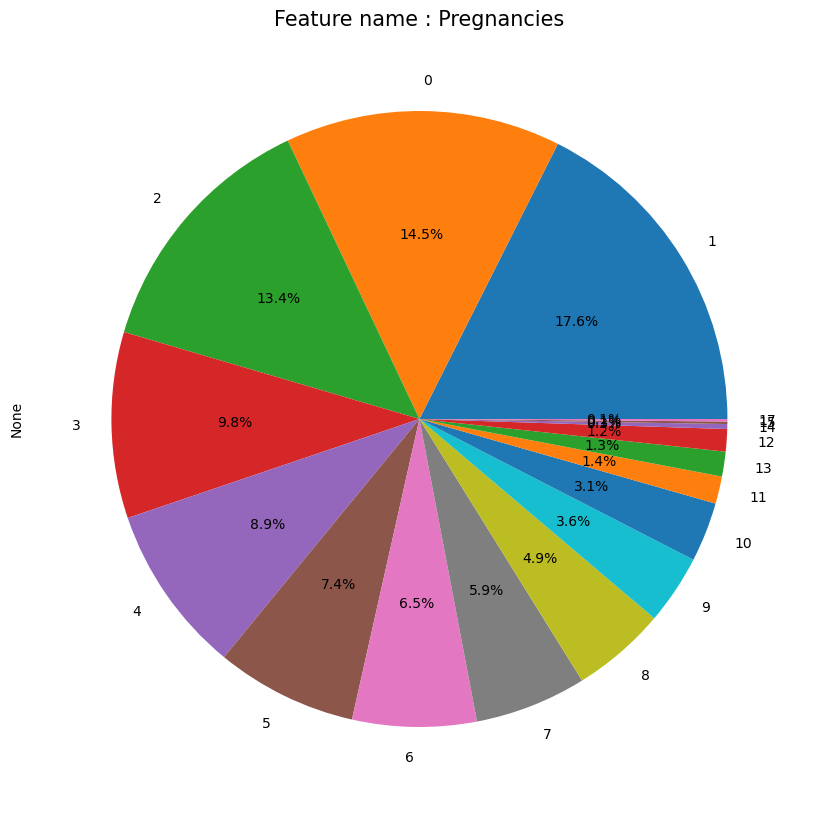

In [133]:
plt.figure(figsize=(20,10))
df.value_counts('Pregnancies').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : Pregnancies", fontsize = 15)

#### Observation :
- Persons with single time pregnancy are more

Text(0.5, 1.0, 'Feature name : BloodPressure')

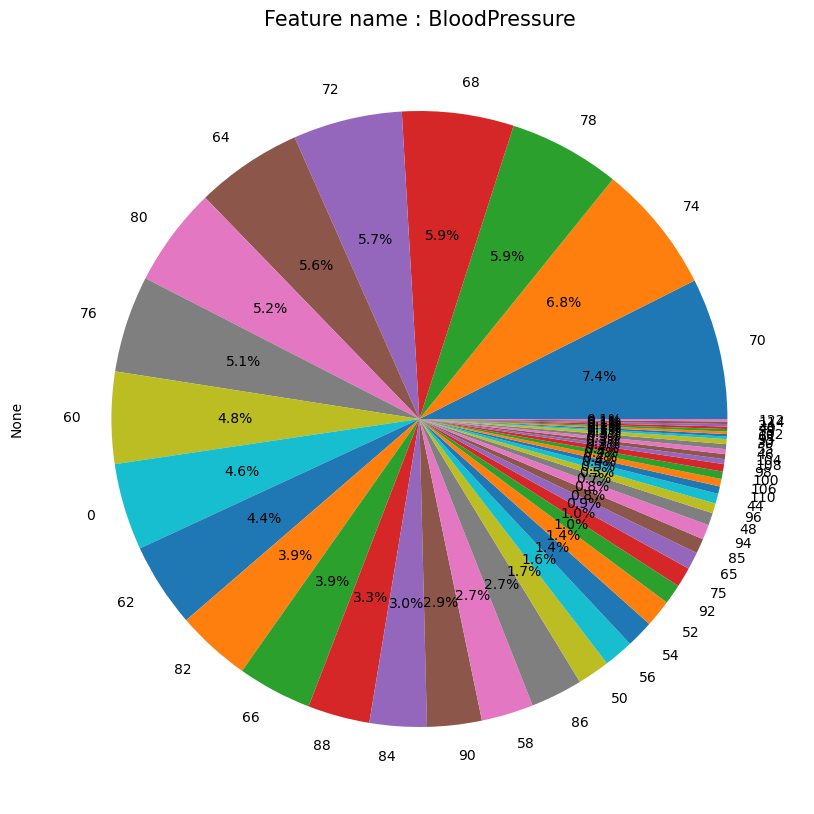

In [134]:
plt.figure(figsize=(20,10))
df.value_counts('BloodPressure').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : BloodPressure", fontsize = 15)

#### Observation :
- From the whole dataset there are more number of persons with BloodPressure '70'

#### Box-plot

<AxesSubplot:>

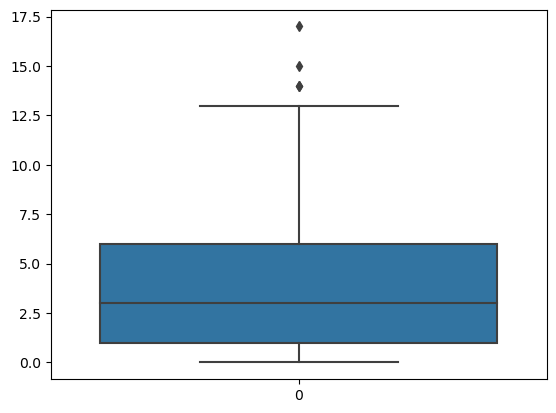

In [135]:
sns.boxplot(df['Pregnancies'])

#### Observation :
- There are outliers in the higher side of the distribution

<AxesSubplot:>

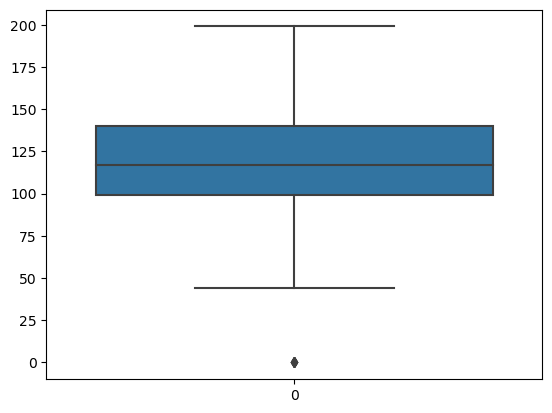

In [136]:
sns.boxplot(df['Glucose'])

#### Observation :
- There is a outlier in the lower side of the distribution

<AxesSubplot:>

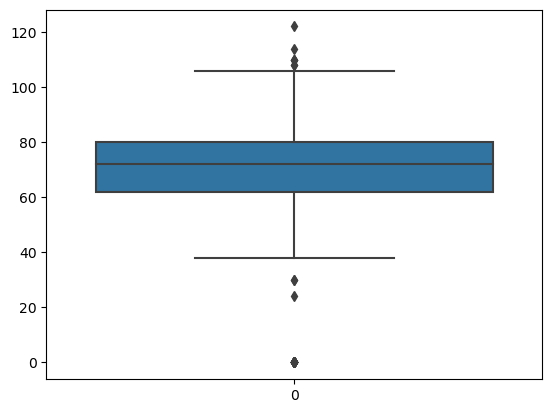

In [137]:
sns.boxplot(df['BloodPressure'])

#### Observation :
- There are outliers in both the side of the distribution

<AxesSubplot:>

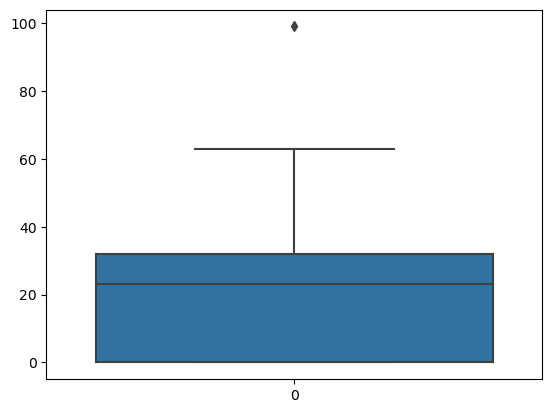

In [138]:
sns.boxplot(df['SkinThickness'])

#### Observation :
- There is a outlier in the higher side of the distribution

<AxesSubplot:>

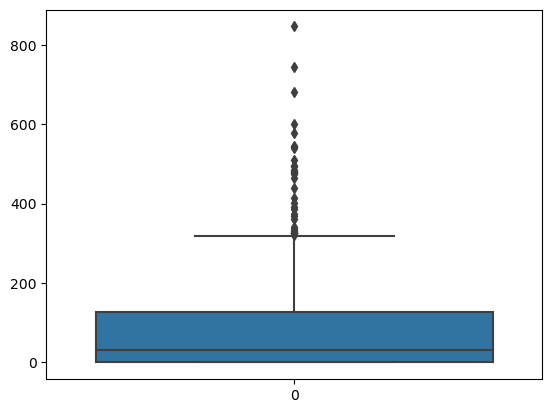

In [139]:
sns.boxplot(df['Insulin'])

#### Observation :
- There are more outliers in the higher side of the distribution

<AxesSubplot:>

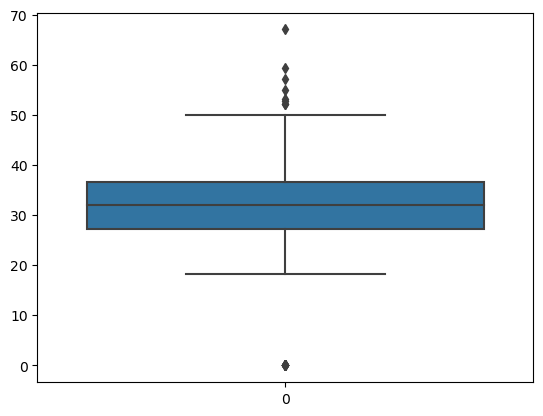

In [140]:
sns.boxplot(df['BMI'])

#### Observation :
- There are more outliers in the higher side of the distribution and a outlier in the lower side of the distribution

<AxesSubplot:>

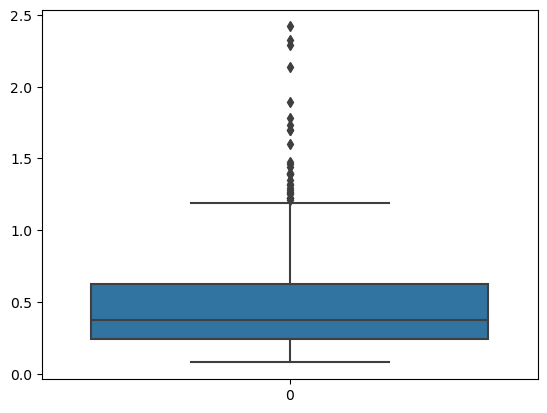

In [141]:
sns.boxplot(df['DiabetesPedigreeFunction'])

#### Observation :
- There are more outliers in the higher side of the distribution.

<AxesSubplot:>

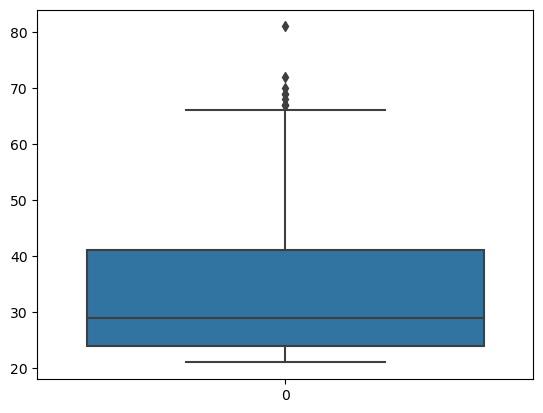

In [142]:
sns.boxplot(df['Age'])

#### Observation :
- There are more outliers in the higher side of the distribution.

### Distplot 
To check the distribution of the dataset in each column

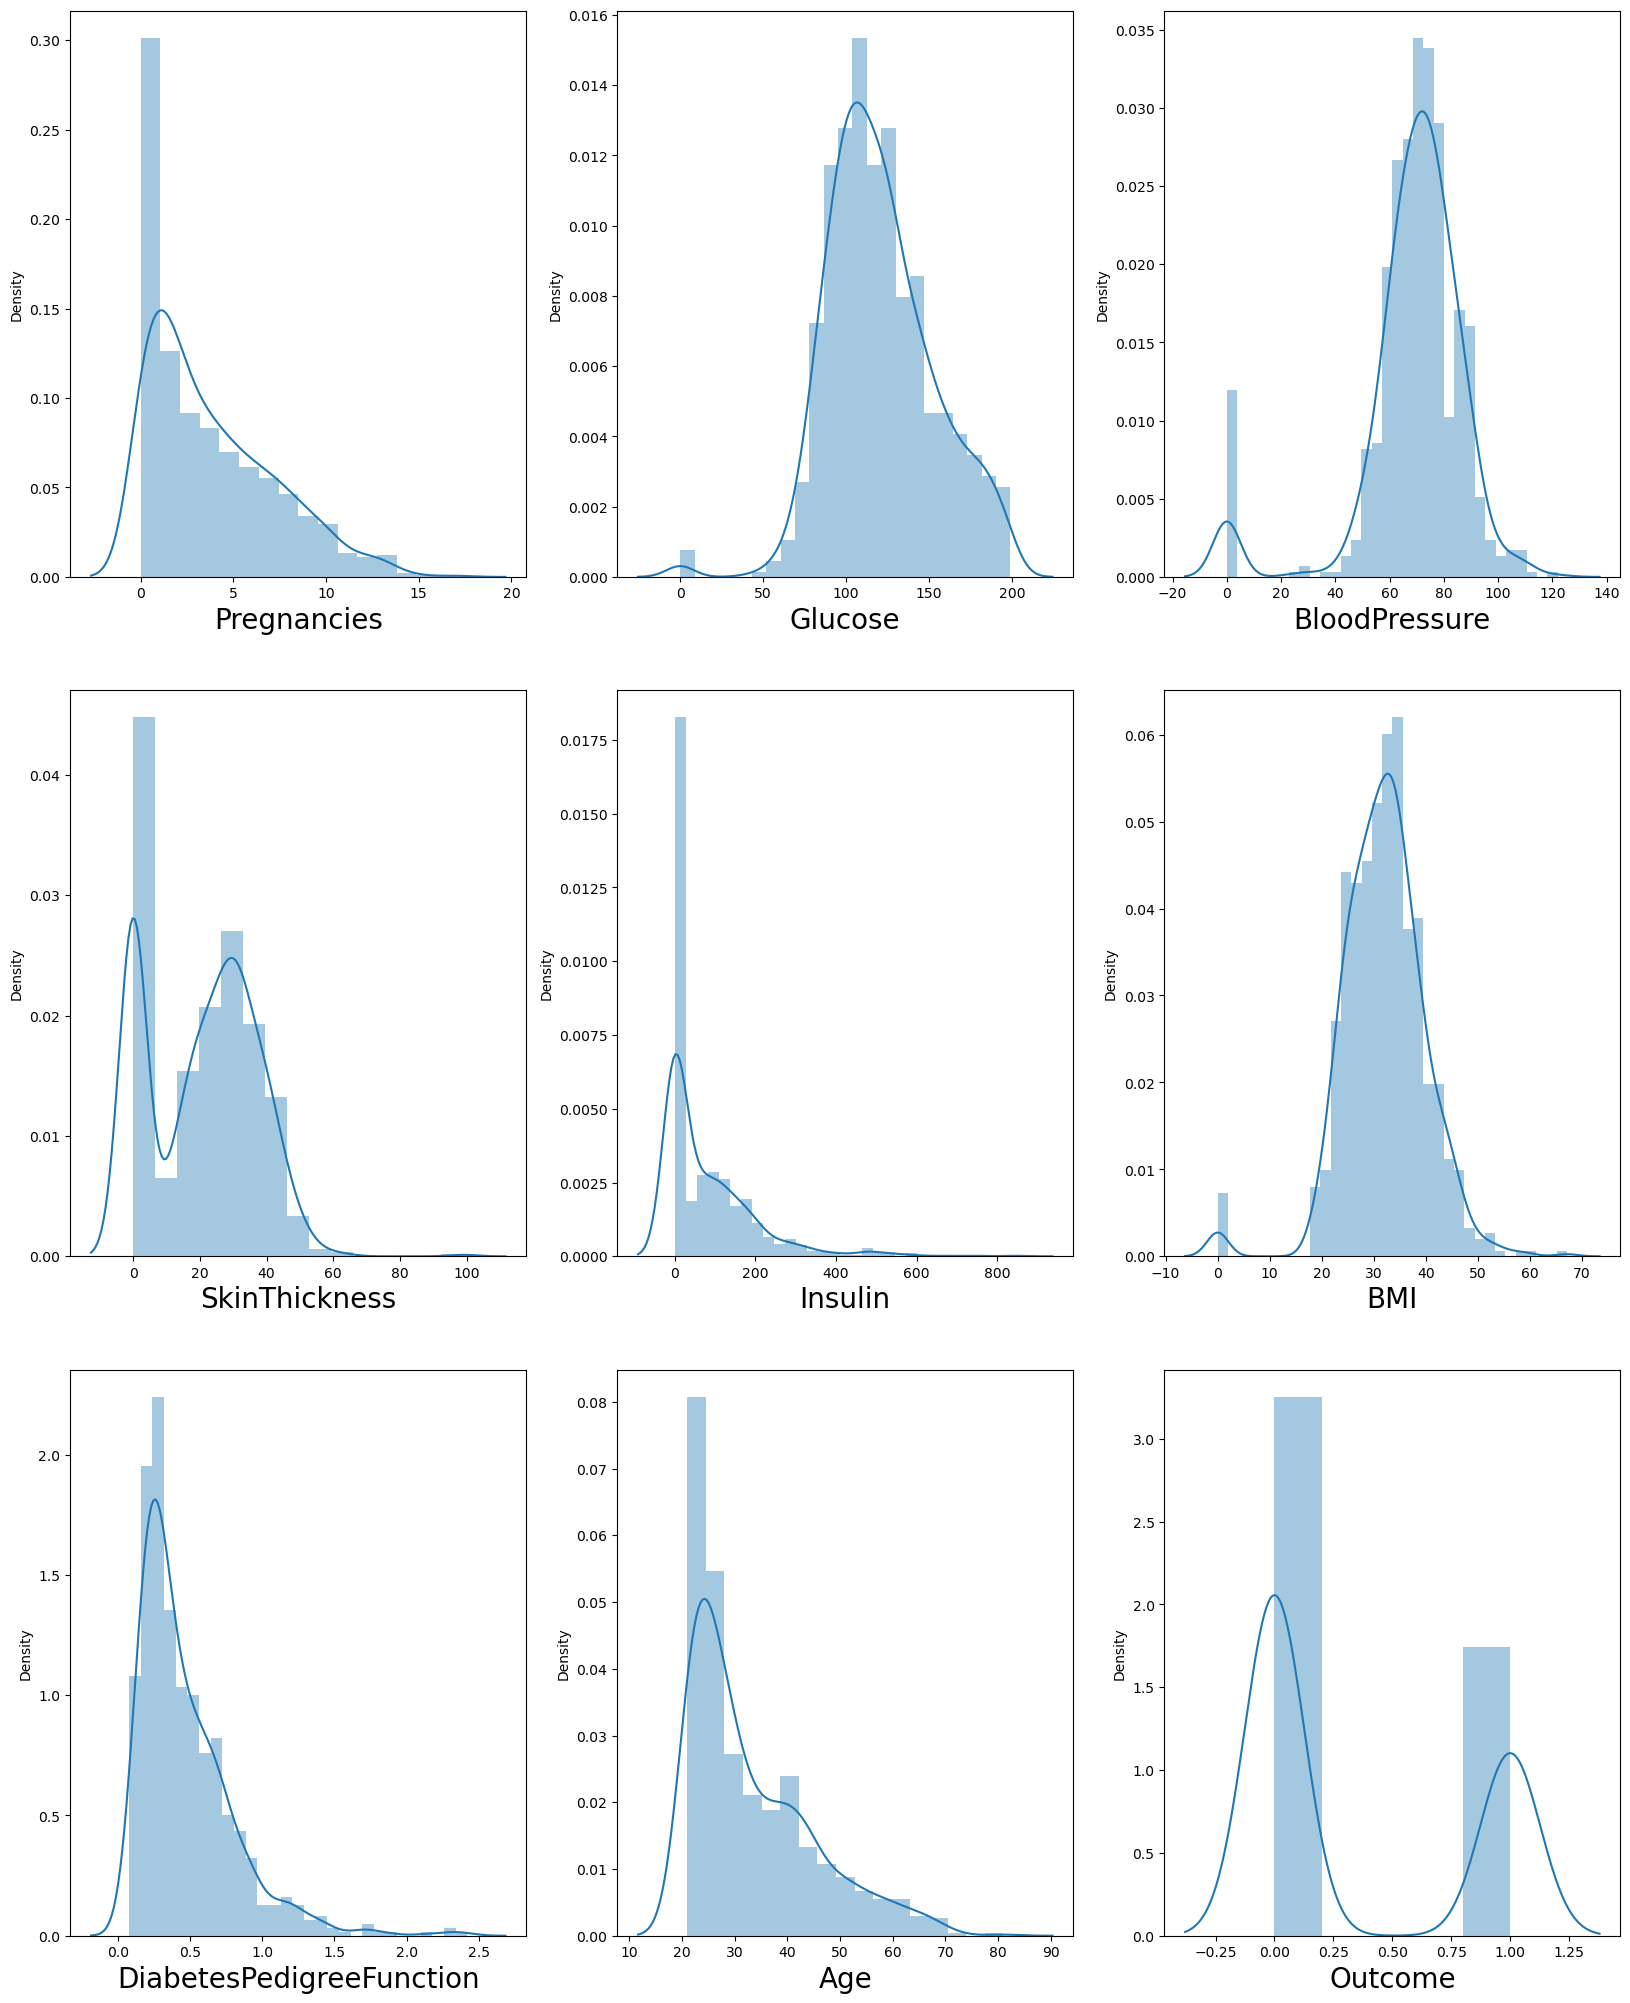

In [143]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])    # To check the distribution of the data
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1
plt.show()

#### Observation :
- Pregnancies is right skewed distributed and most of the data falls in between 0-13.
- Glucose is normally distributed and most of the data falls in between 50-200.
- BloodPressure is normally distributed and most of the data falls in between 40-120.
- Insulin is right skewed distributed and most of the data falls in between 0-400.
- BMI is normally distributed and most of the data falls in between 20-55.
- DiabetesPedigreeFunction is right skewed distributed and most of the data falls in between 0.1-1.8.
- Age is right skewed distributed and most of the data falls in between 21-70.

From the above observation we can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do this

In [144]:
df_mean = df.copy()

In [145]:
# replacing zero values with the mean of the column

df_mean['BMI'] = df_mean['BMI'].replace(0,df_mean['BMI'].mean())
df_mean['BloodPressure'] = df_mean['BloodPressure'].replace(0,df_mean['BloodPressure'].mean())
df_mean['Glucose'] = df_mean['Glucose'].replace(0,df_mean['Glucose'].mean())
df_mean['Insulin'] = df_mean['Insulin'].replace(0,df_mean['Insulin'].mean())
df_mean['SkinThickness'] = df_mean['SkinThickness'].replace(0,df_mean['SkinThickness'].mean())

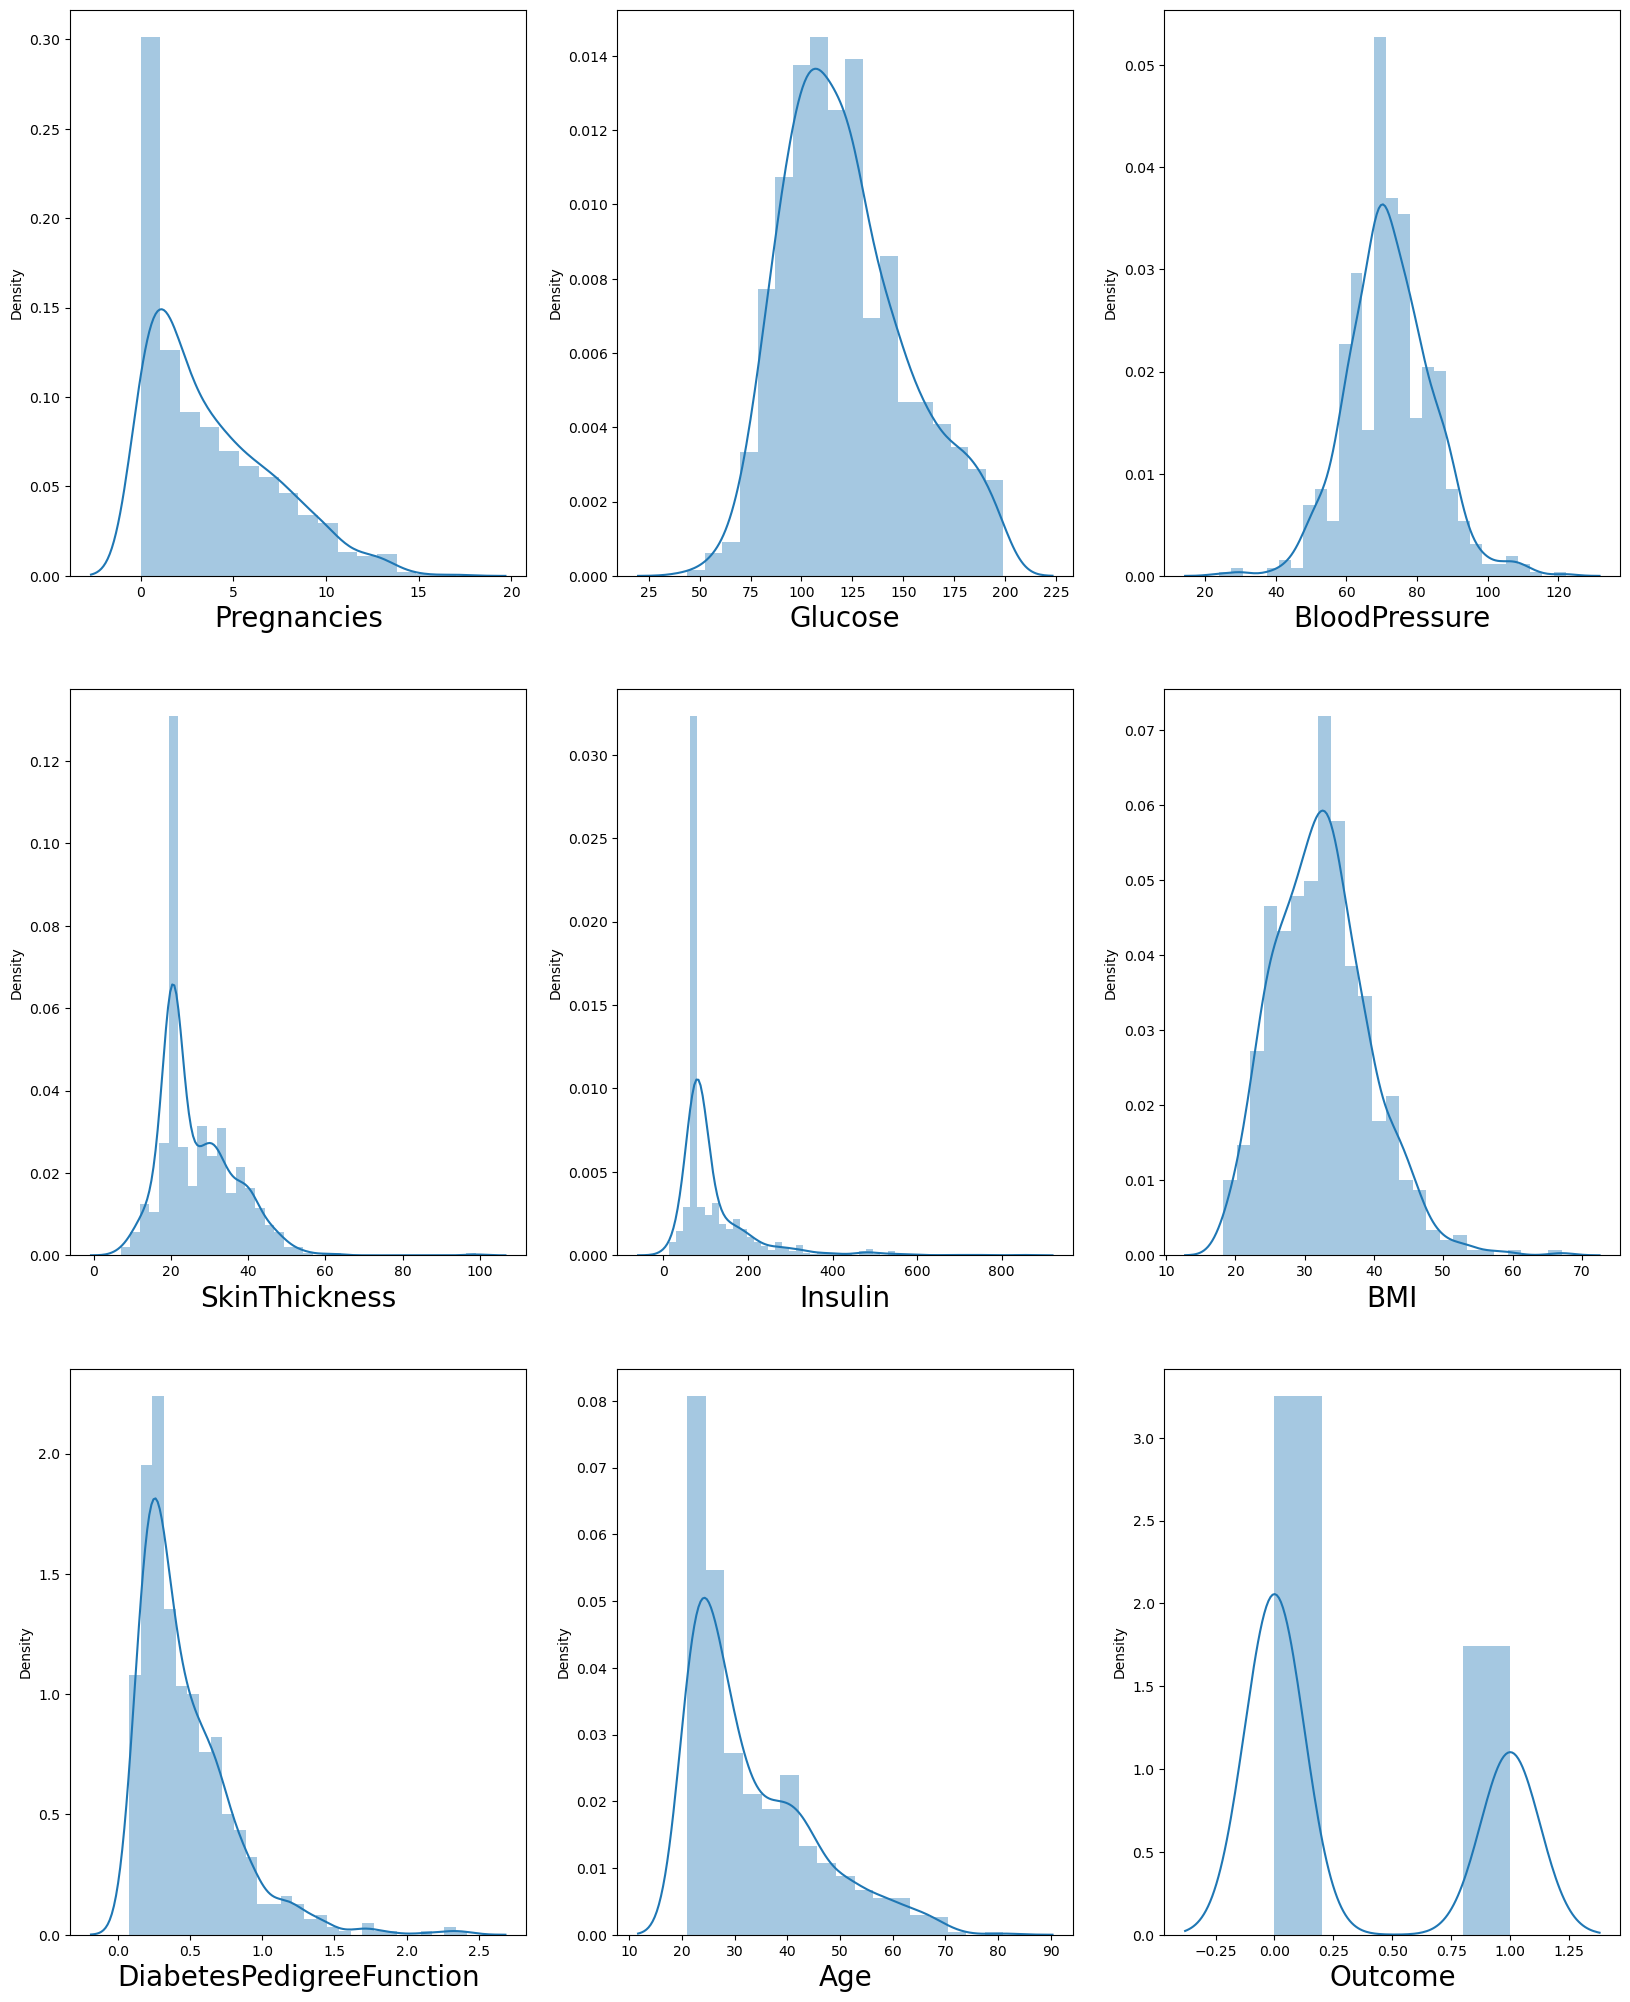

In [146]:
# let's see how data is distributed for every column after mean imputation with 0.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_mean[column])    # To check the distribution of the data
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1
plt.show()

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns. Let's deal with them.

#### Boxplot & kde

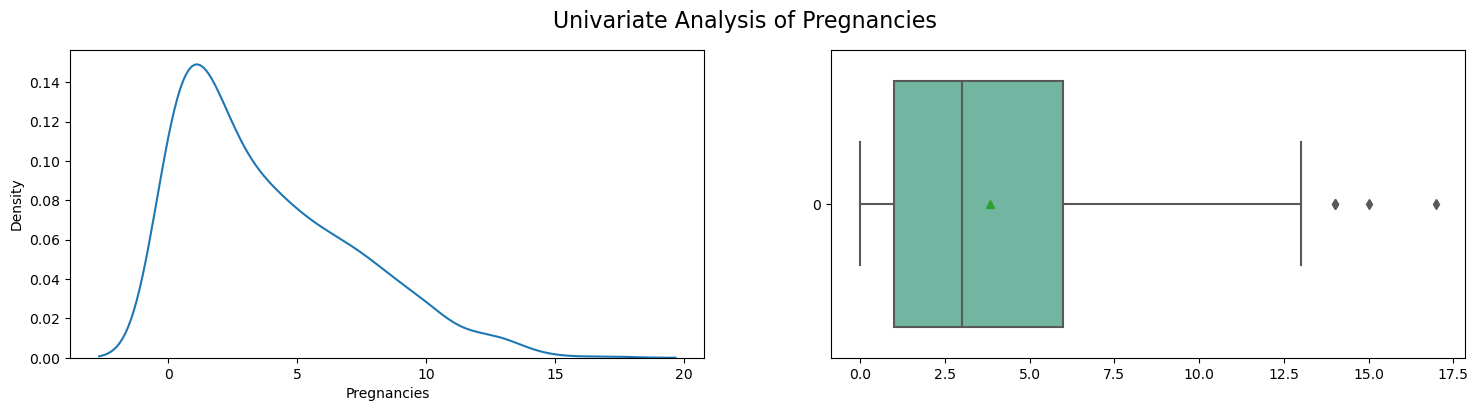

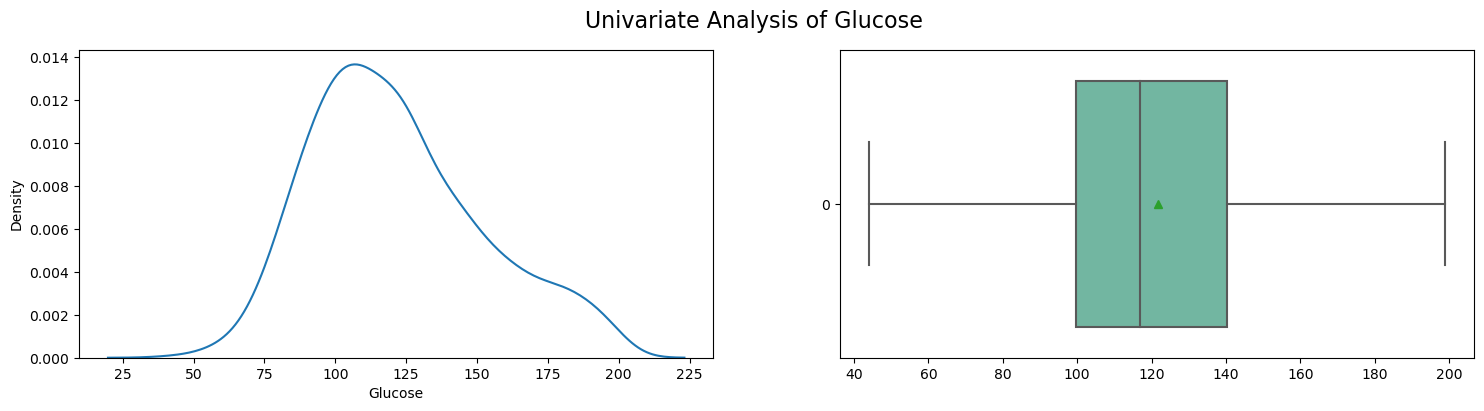

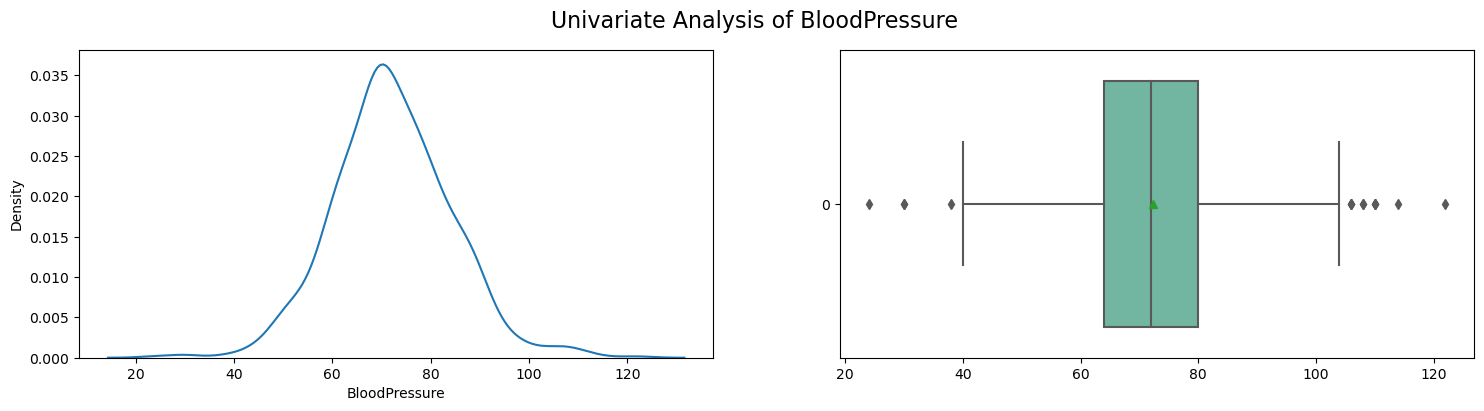

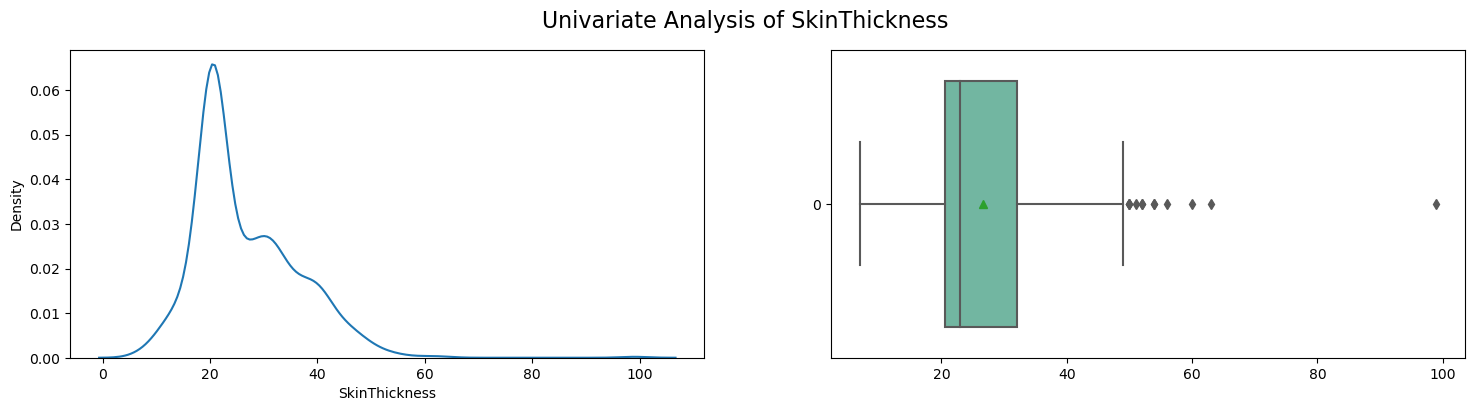

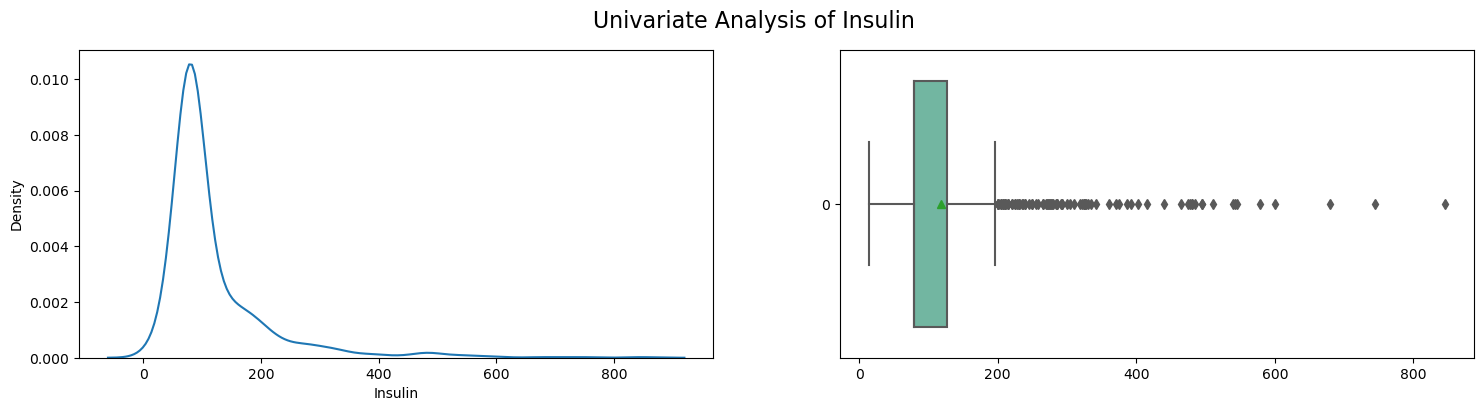

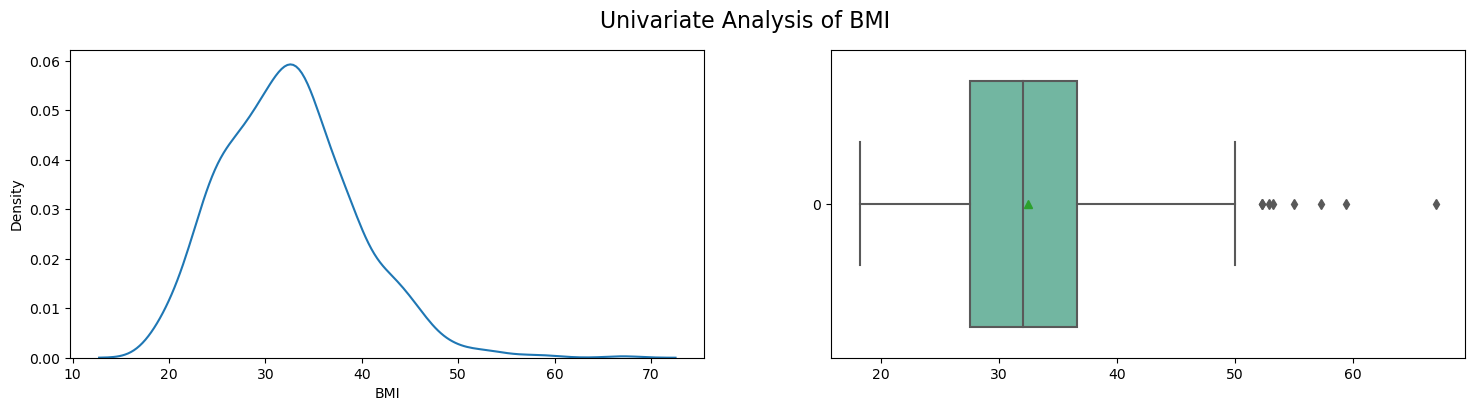

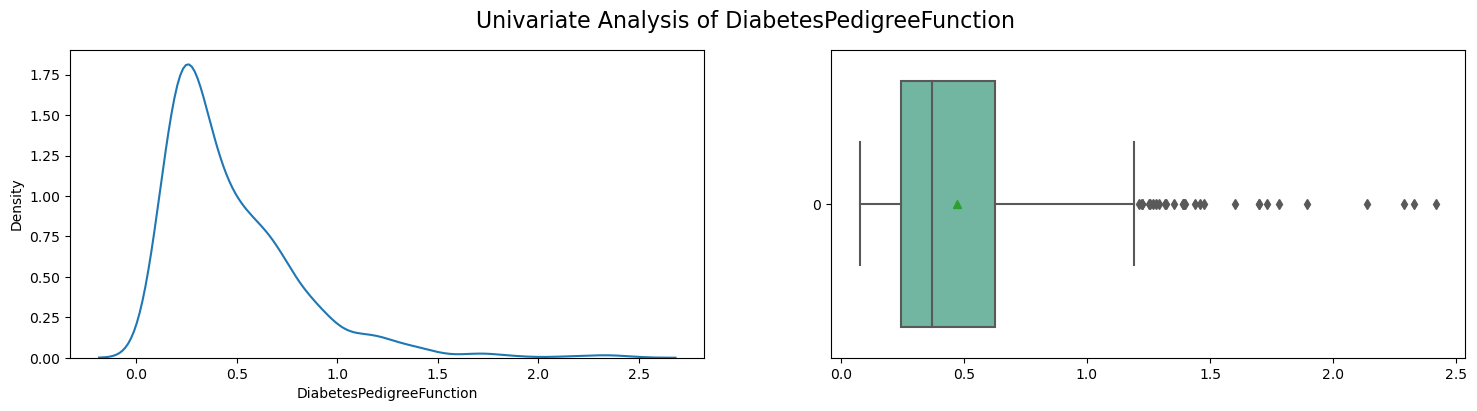

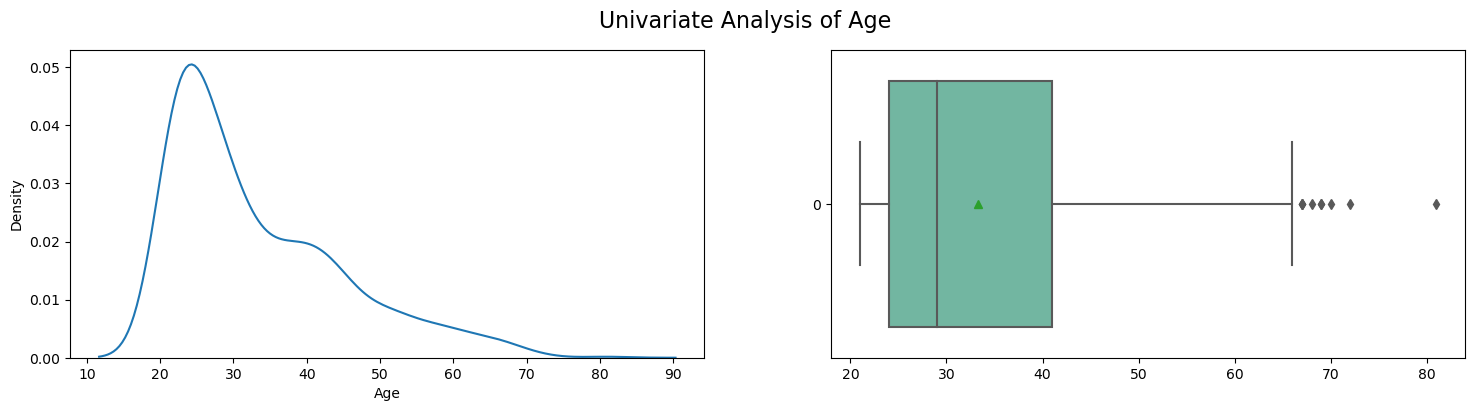

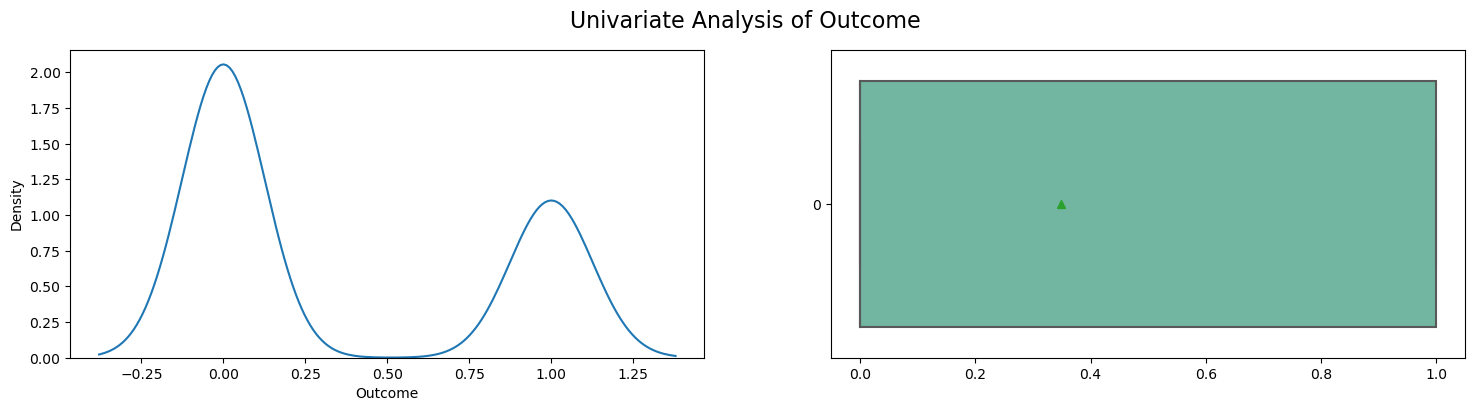

In [147]:
x_axis = df
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(df_mean[x], ax=axes[0], kde = True, hist=False)
    sns.boxplot(df_mean[x], ax=axes[1], orient = "h", showmeans = True,palette="Set2")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

#### Observation :
- 'Pregnancies', 'Insulin',  'DiabetesPedigreeFunction', 'Age' are right skewed distributed.
- 'Glucose', 'BloodPressure', 'BMI' follows approximately normal distributed

#### Scatter plot to see the trend in each numerical columns

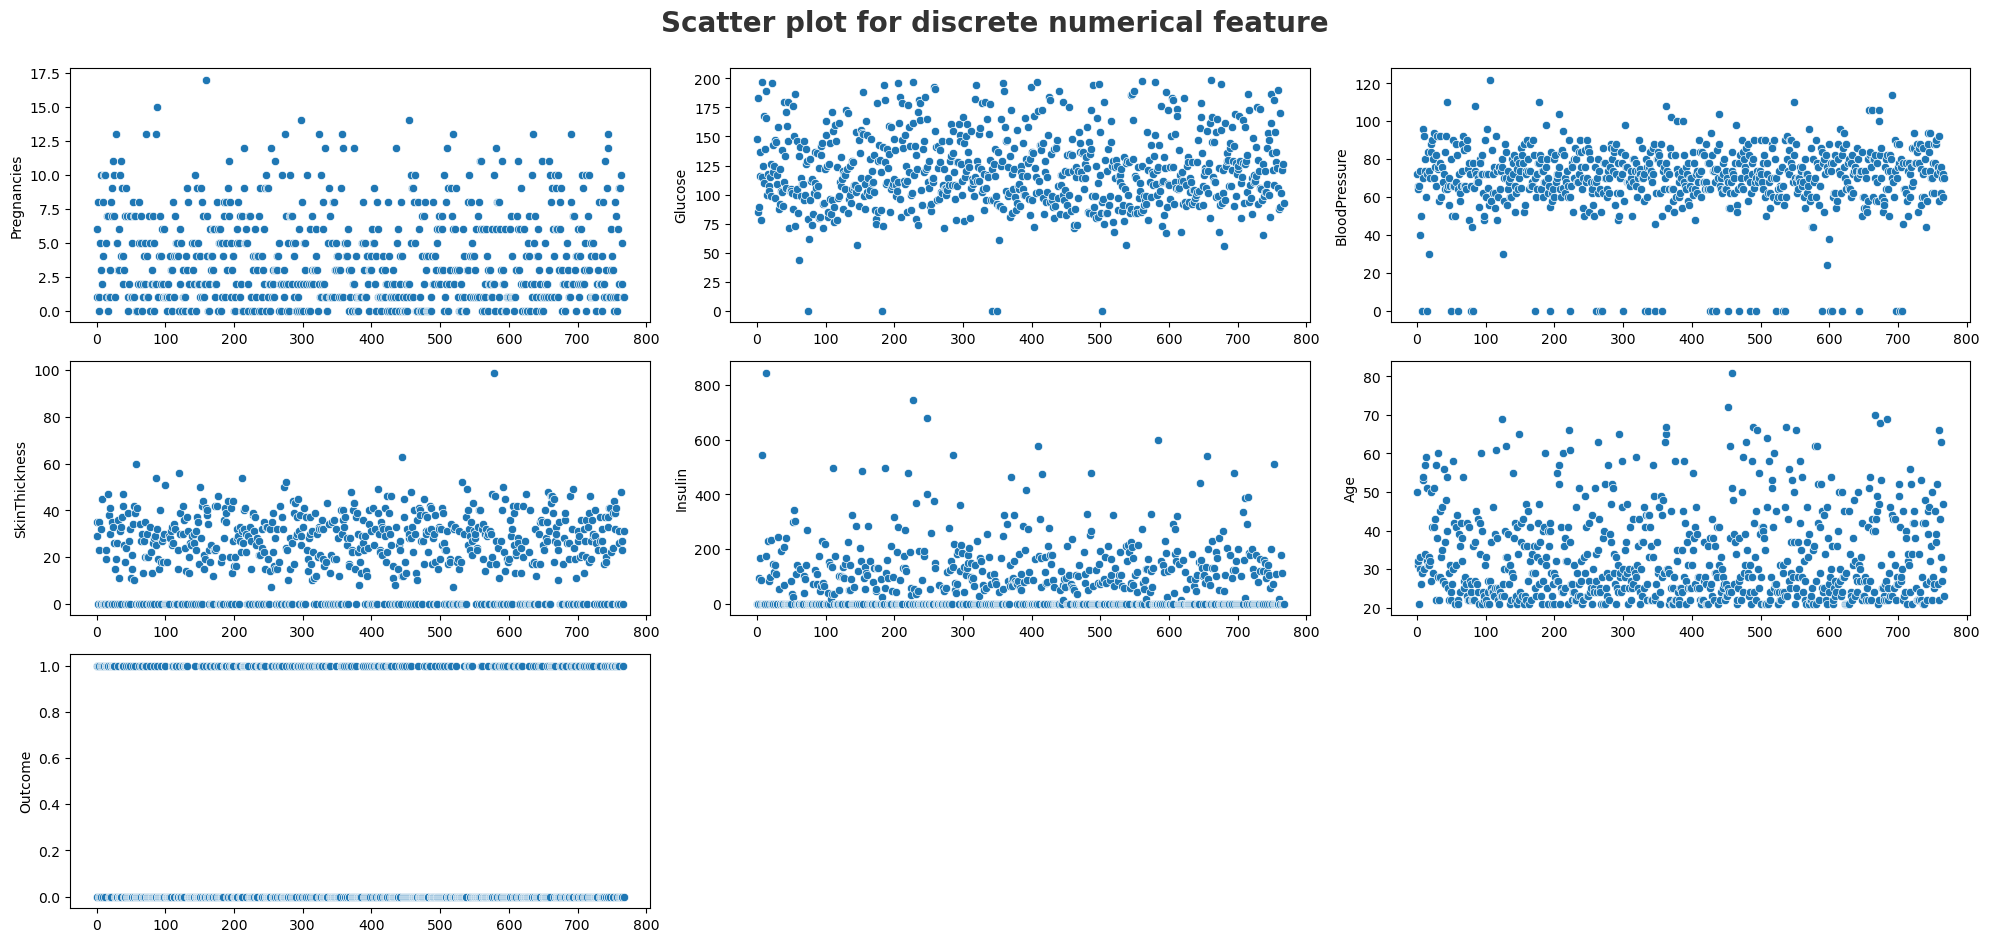

In [148]:
plt.figure(figsize=(20,15))
plt.suptitle('Scatter plot for discrete numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(df_dis)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=df_dis[i], x=df.index, data=df)
    plt.tight_layout()

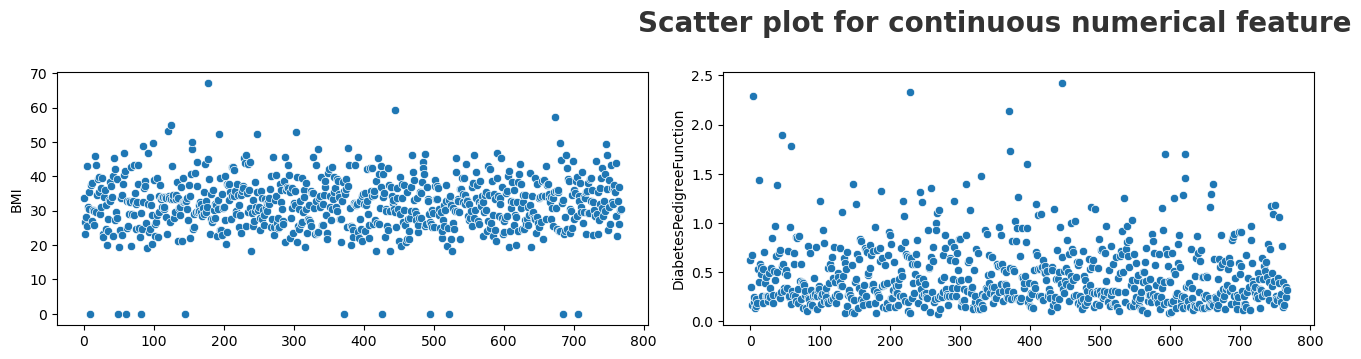

In [149]:
plt.figure(figsize=(20,15))
plt.suptitle('Scatter plot for continuous numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(df_cont)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=df_cont[i], x=df.index, data=df)
    plt.tight_layout()

#### Observation :
- There is no such trend in the features

In [150]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

#### Regplot
To check the trend between features and output label

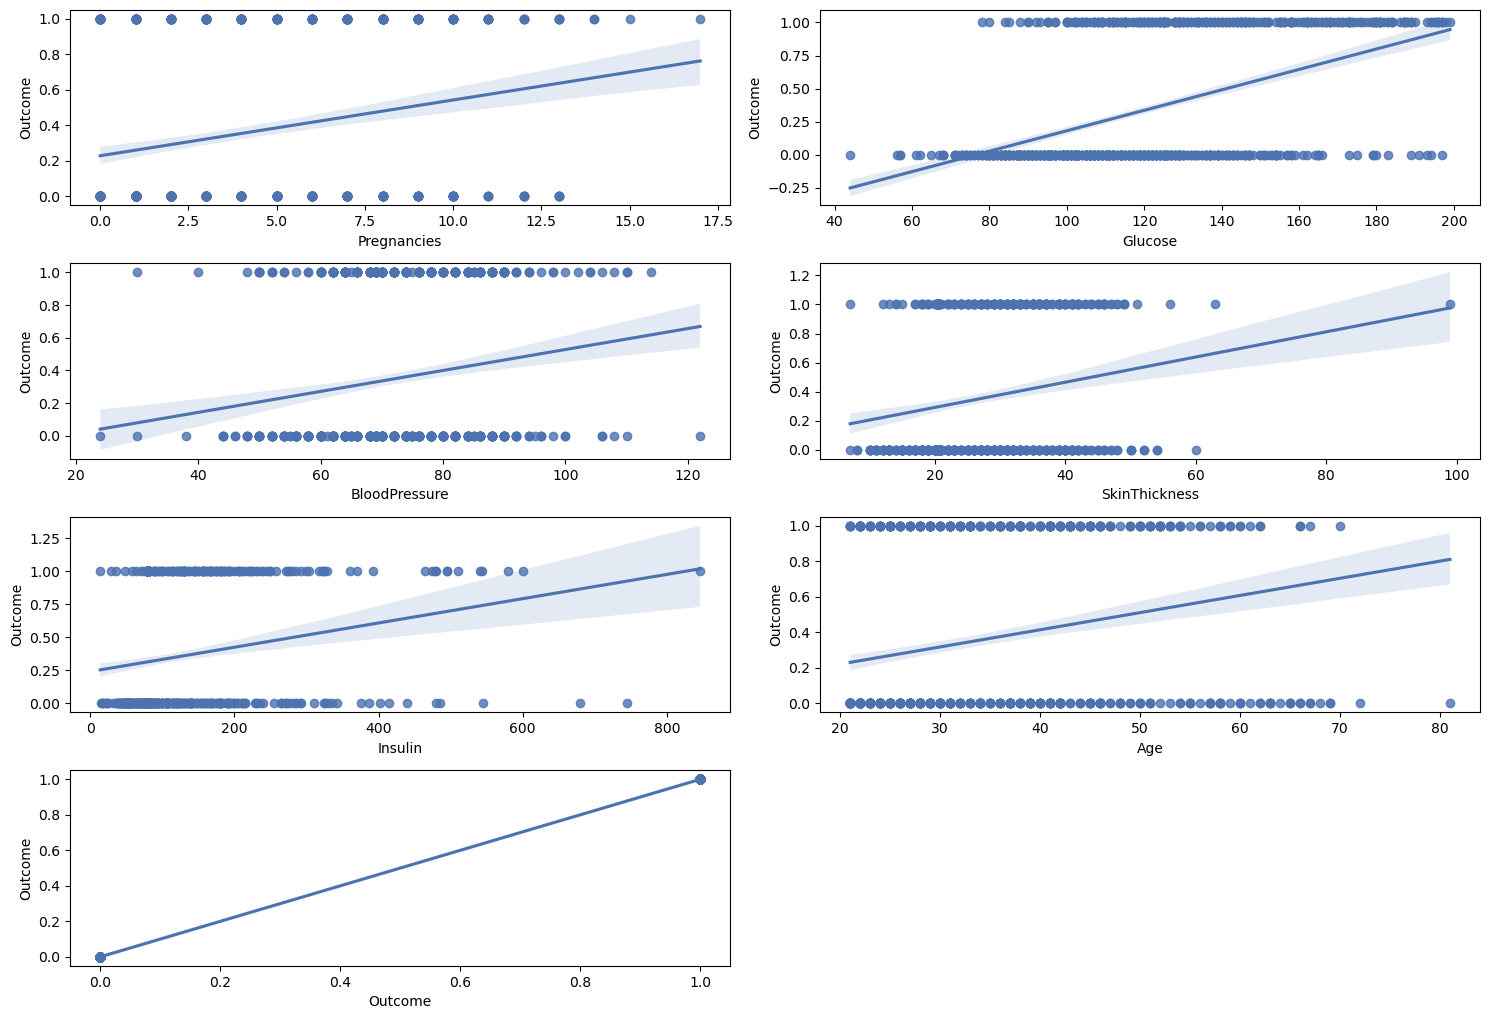

In [151]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(df_dis)):
    ax = plt.subplot(8, 2, i+1)

    sns.regplot(data= df_mean ,y='Outcome', x=df_dis[i], color='b')
    
    plt.tight_layout()

### Bivariate Analysis
- Bivariate analysis is the analysis of two variables to find out relationship between them.

<AxesSubplot:xlabel='BloodPressure', ylabel='Outcome'>

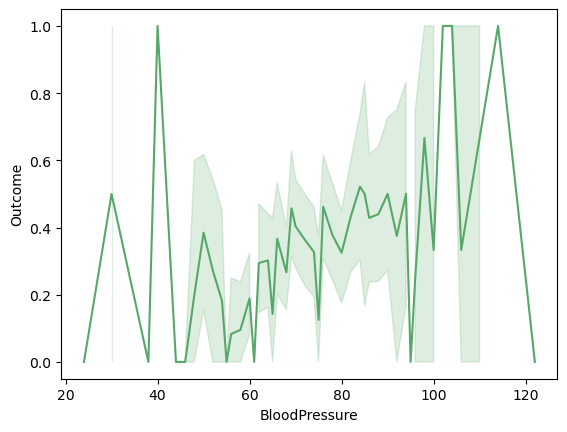

In [152]:
sns.lineplot(x='BloodPressure', y='Outcome', data=df_mean, color='g')

#### Observation :
- There is partially positive correlation in between the BloodPressure and Outcome.

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

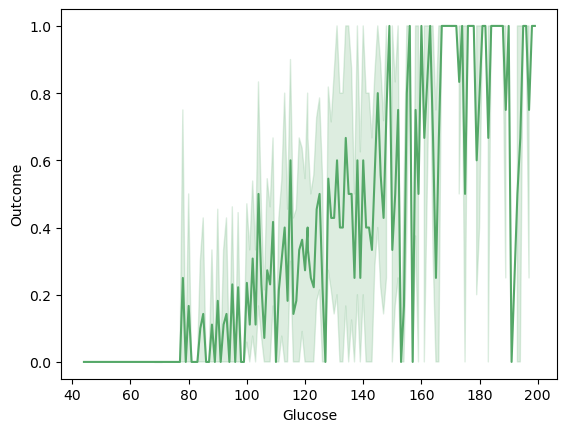

In [153]:
sns.lineplot(x='Glucose', y='Outcome', data=df_mean, color='g')

#### Observation :
- There is a positive correlation in between the BloodPressure and Outcome.

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

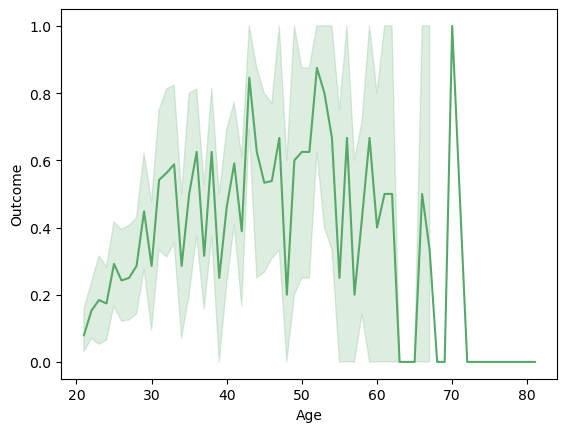

In [154]:
sns.lineplot(x='Age', y='Outcome', data=df_mean, color='g')

#### Observation :
- There is a positive correlation in between the Age and Outcome.

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

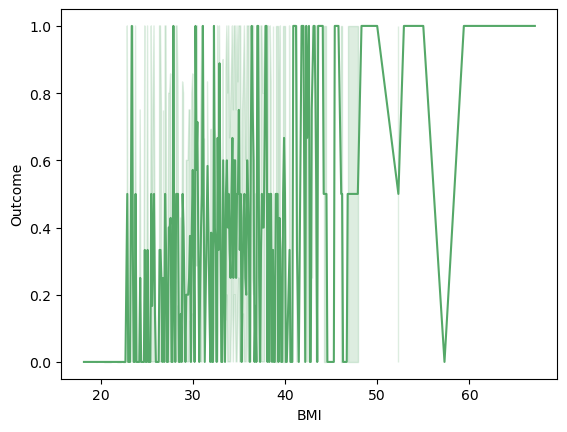

In [155]:
sns.lineplot(x='BMI', y='Outcome', data=df_mean, color='g')

#### Observation :
- There no such correlation in between the BMI and Outcome.

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

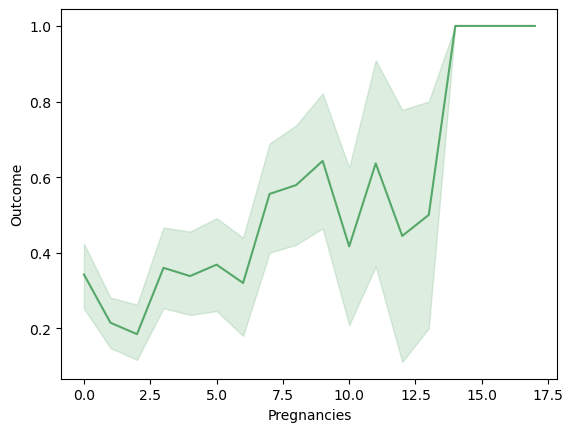

In [156]:
sns.lineplot(x='Pregnancies', y='Outcome', data=df_mean, color='g')

#### Observation :
- There is a positive correlation in between the Pregnancies and Outcome.

#### Q-Q plot
To check features distribution

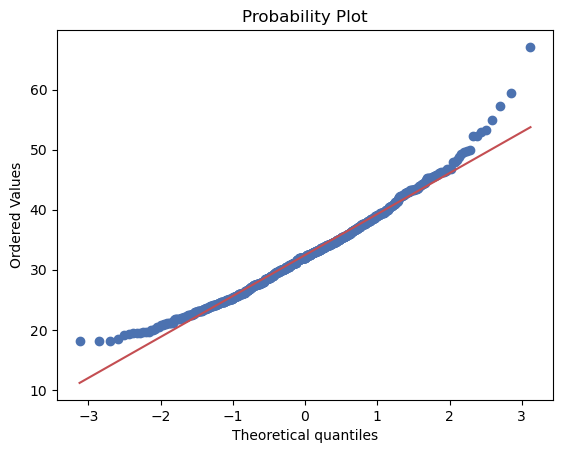

In [157]:
import scipy.stats as stats

stats.probplot(x = df_mean['BMI'], plot=plt, dist='norm')
plt.show()

#### Observation :
- BMI is normally distributed.

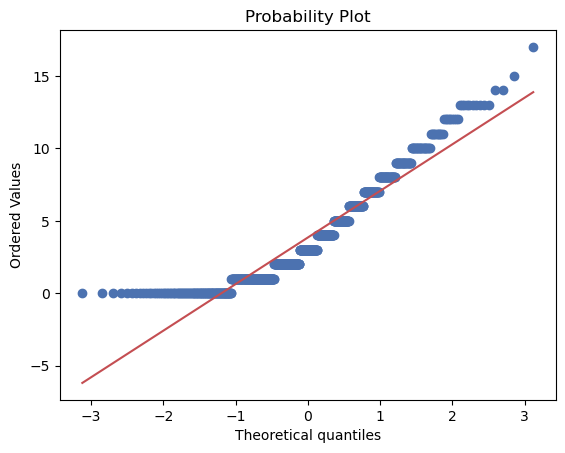

In [158]:
import scipy.stats as stats

stats.probplot(x = df_mean['Pregnancies'], plot=plt, dist='norm')
plt.show()

#### Observation :
- Pregnancies is not normally distributed.

#### Bargraph 
To see correlation between two features

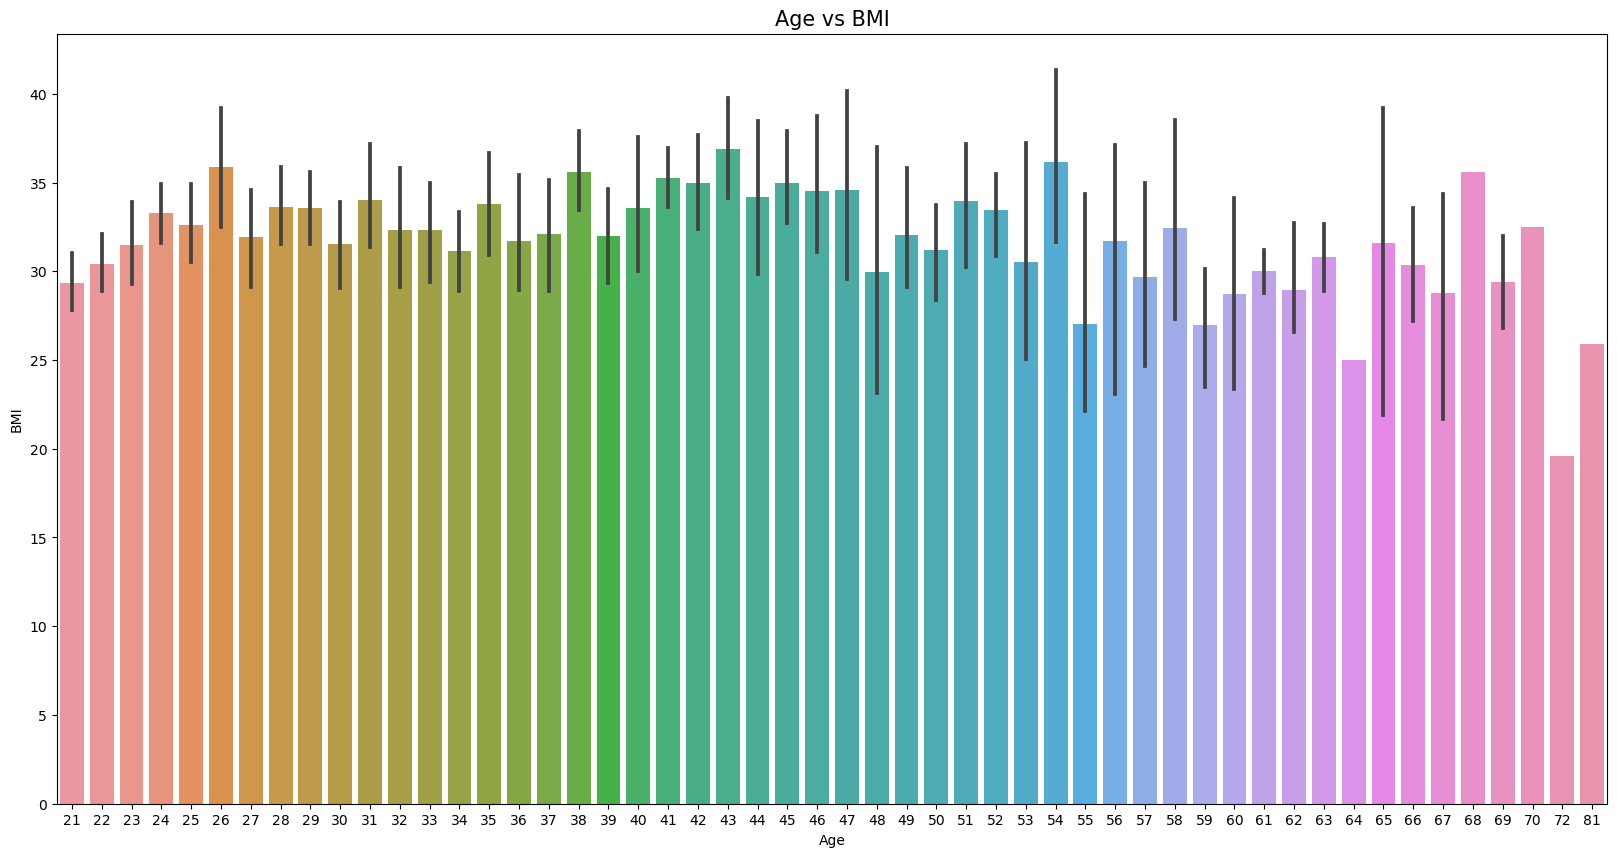

In [159]:
plt.figure(figsize=(20,10))
plt.style.use('default')
sns.barplot(x='Age', y='BMI', data=df_mean)
plt.title('Age vs BMI', fontsize=15)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

#### Observation :

There is an elder person with age '69' having lowest BMI

### Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.

##### Plots
stripplot (categorical vs numerical)

scatterplot/pairplot (numerical vs numerical) (check correlation)

boxplot (outliers)

heatmap (correlation)

Lineplot (trend in numerical feature with time)

### Check Multicollinearity in Numerical features

In [160]:
df[list(df_mean.columns)].corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

#### Observation :
- There is not much correlation in between the features

#### pairplot 
To check the relationship with features

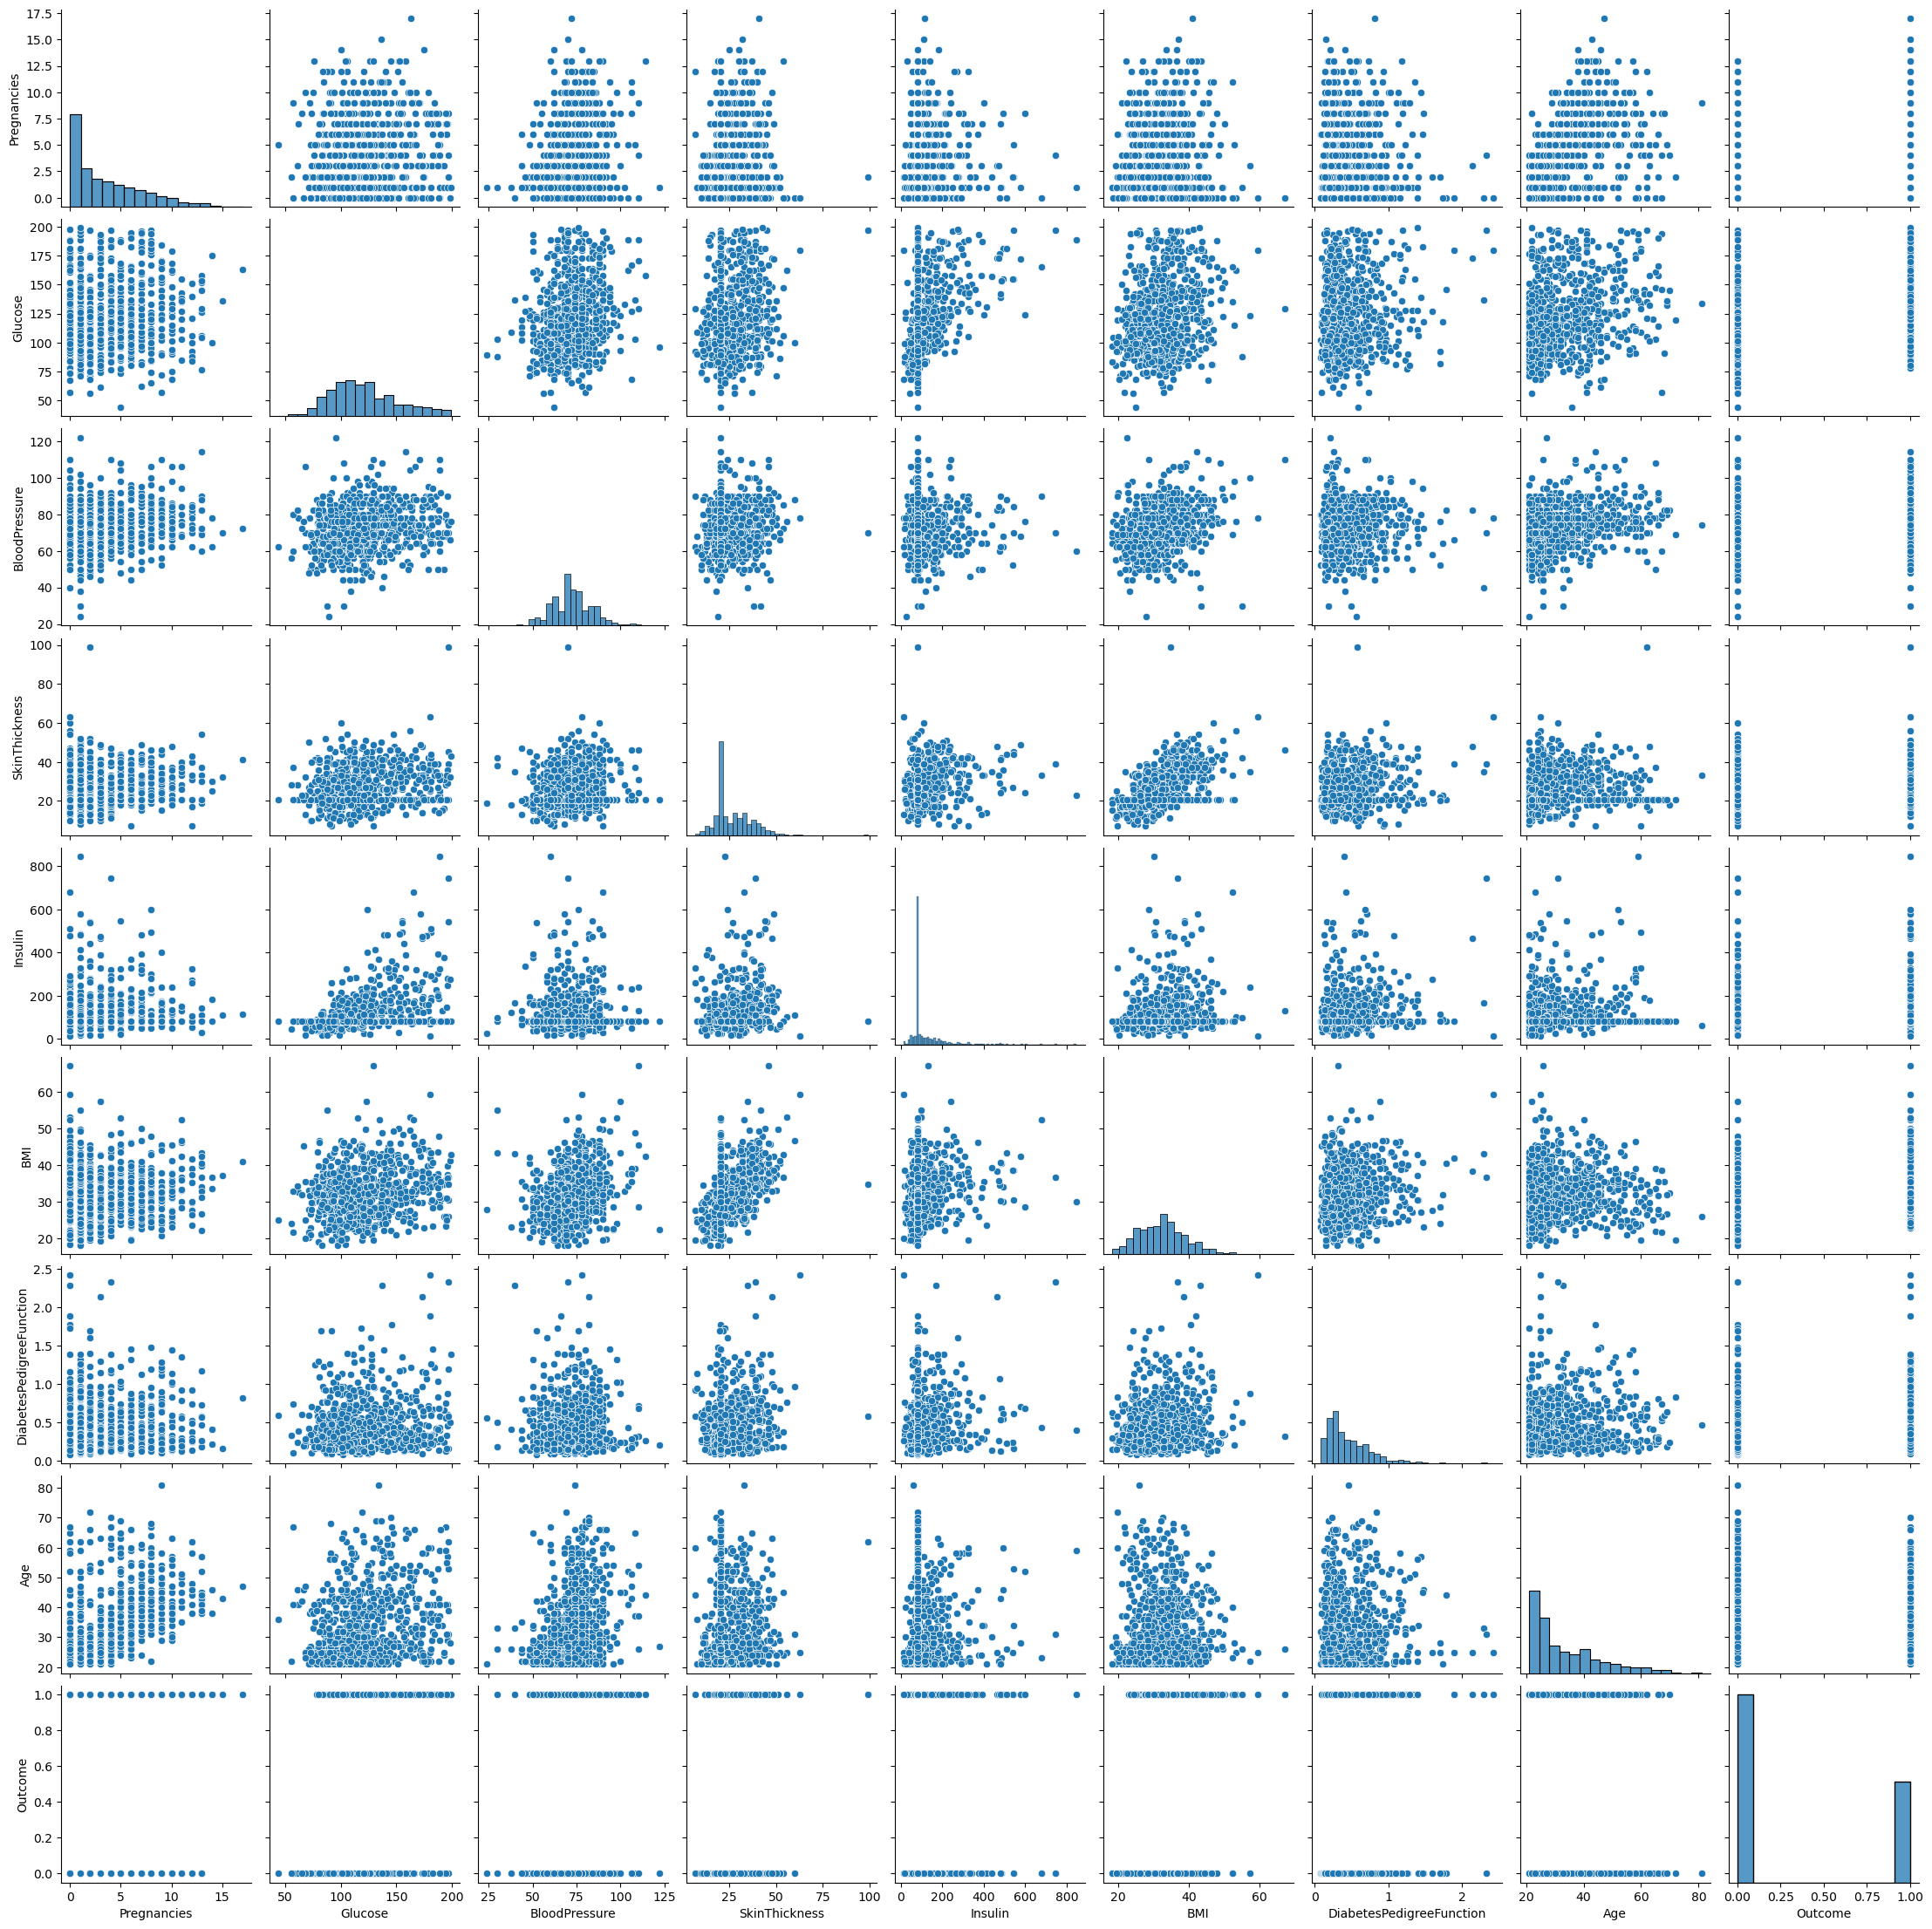

In [161]:
sns.pairplot(df_mean)

#### Observation :
- Glucose and Insulin are approximately positively related
- BMI and BloodPressure are approximately positively related
- BMI and SkinThickness are approximately positively related
- Glucose and Insulin are approximately positively related

#### Heatmap
- To check correlation between the features

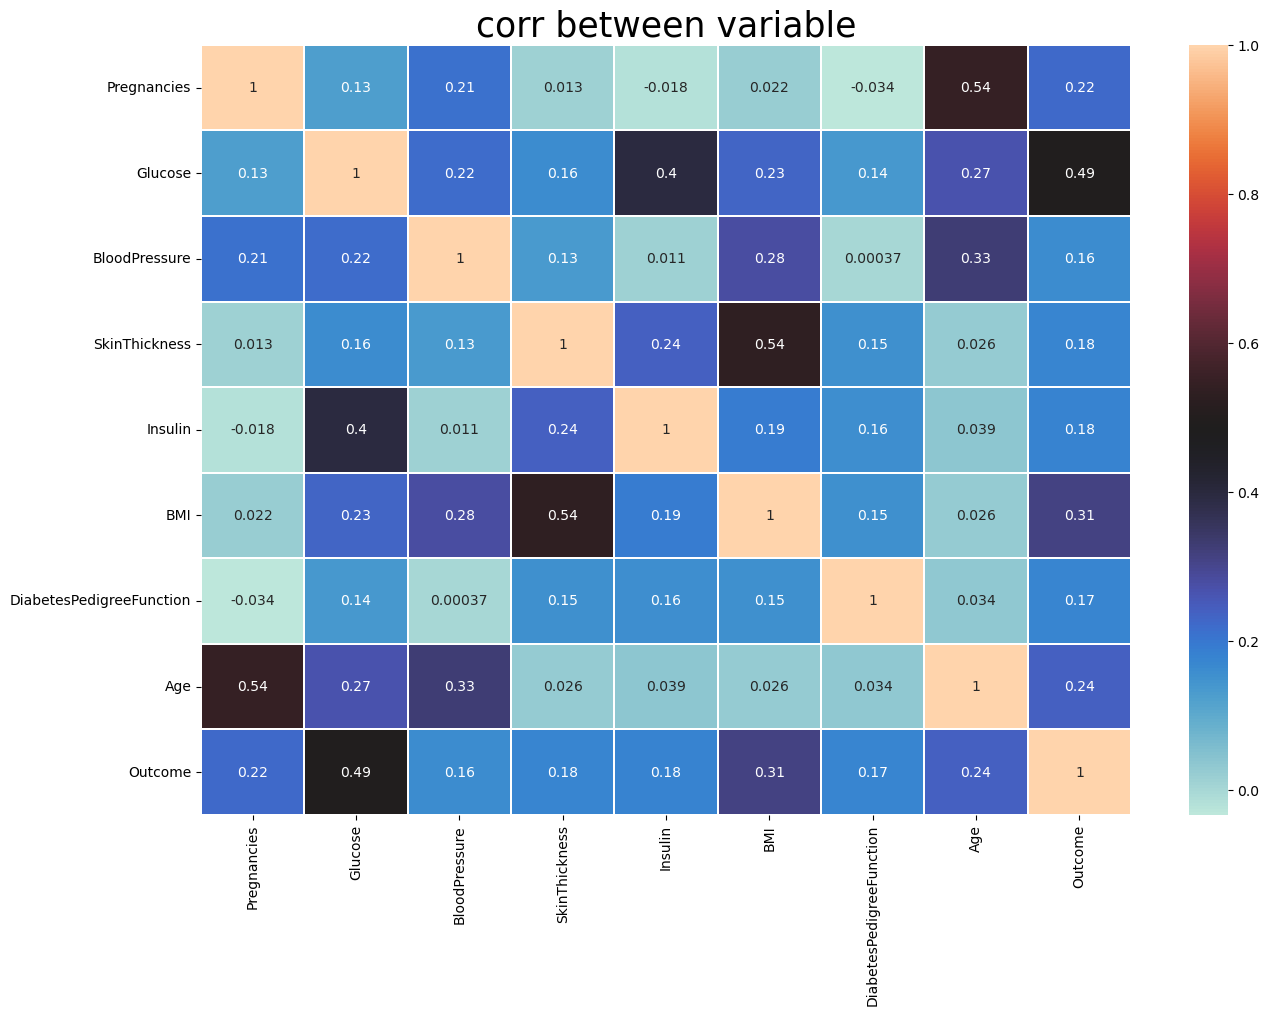

In [162]:
sns.heatmap(df_mean.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color='black',size=25)
plt.show()

#### Observation :
- Insulin and BloodPressure are positively correlated
- Pregnancies and SkinThickness are negatively correlated

#### Box Plot 
To find outliers in each and every data

<AxesSubplot:>

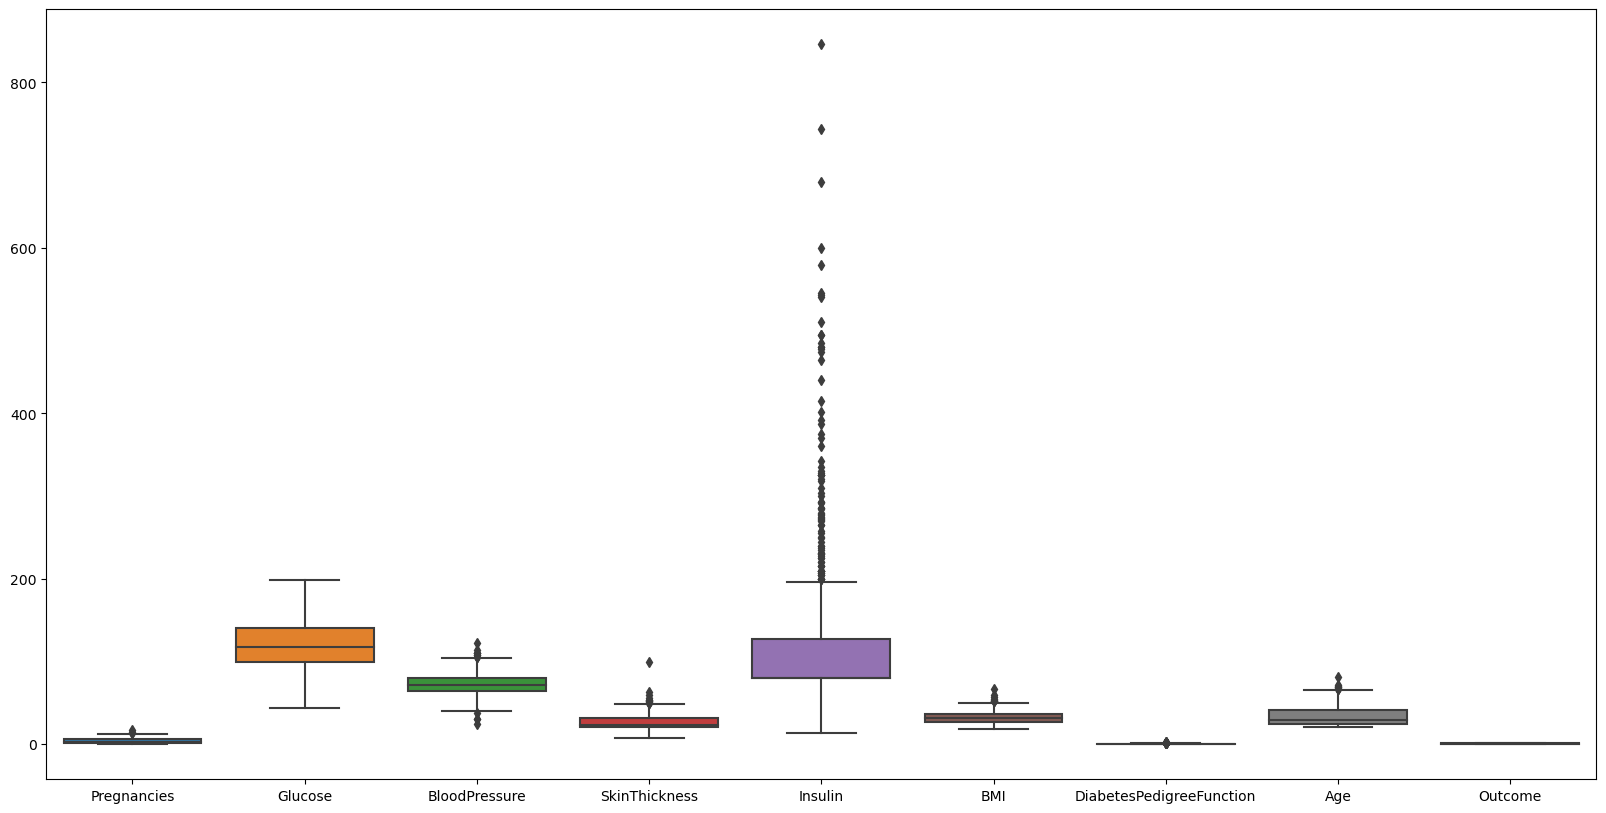

In [163]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df_mean, orient='v')

#### Observation :
- 'Glucose' has outliers in the lower side of the distribution
- 'BloodPressure' has outliers in both side of the distribution
- 'SkinThickness' has outliers in the higher side of the distribution
- 'Insulin' has outliers in the higher side of the distribution
- 'BMI' has outliers in both side of the distribution
- 'Age' has outliers in both higher side of the distribution

To handle outliers we can use IQR

In [164]:
q = df_mean['Pregnancies'].quantile(0.98)   # We are considering 98 percentile of data based on random observation
# we are removing the top 2% data from the Pregnancies column
data_cleaned = df_mean[df_mean['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

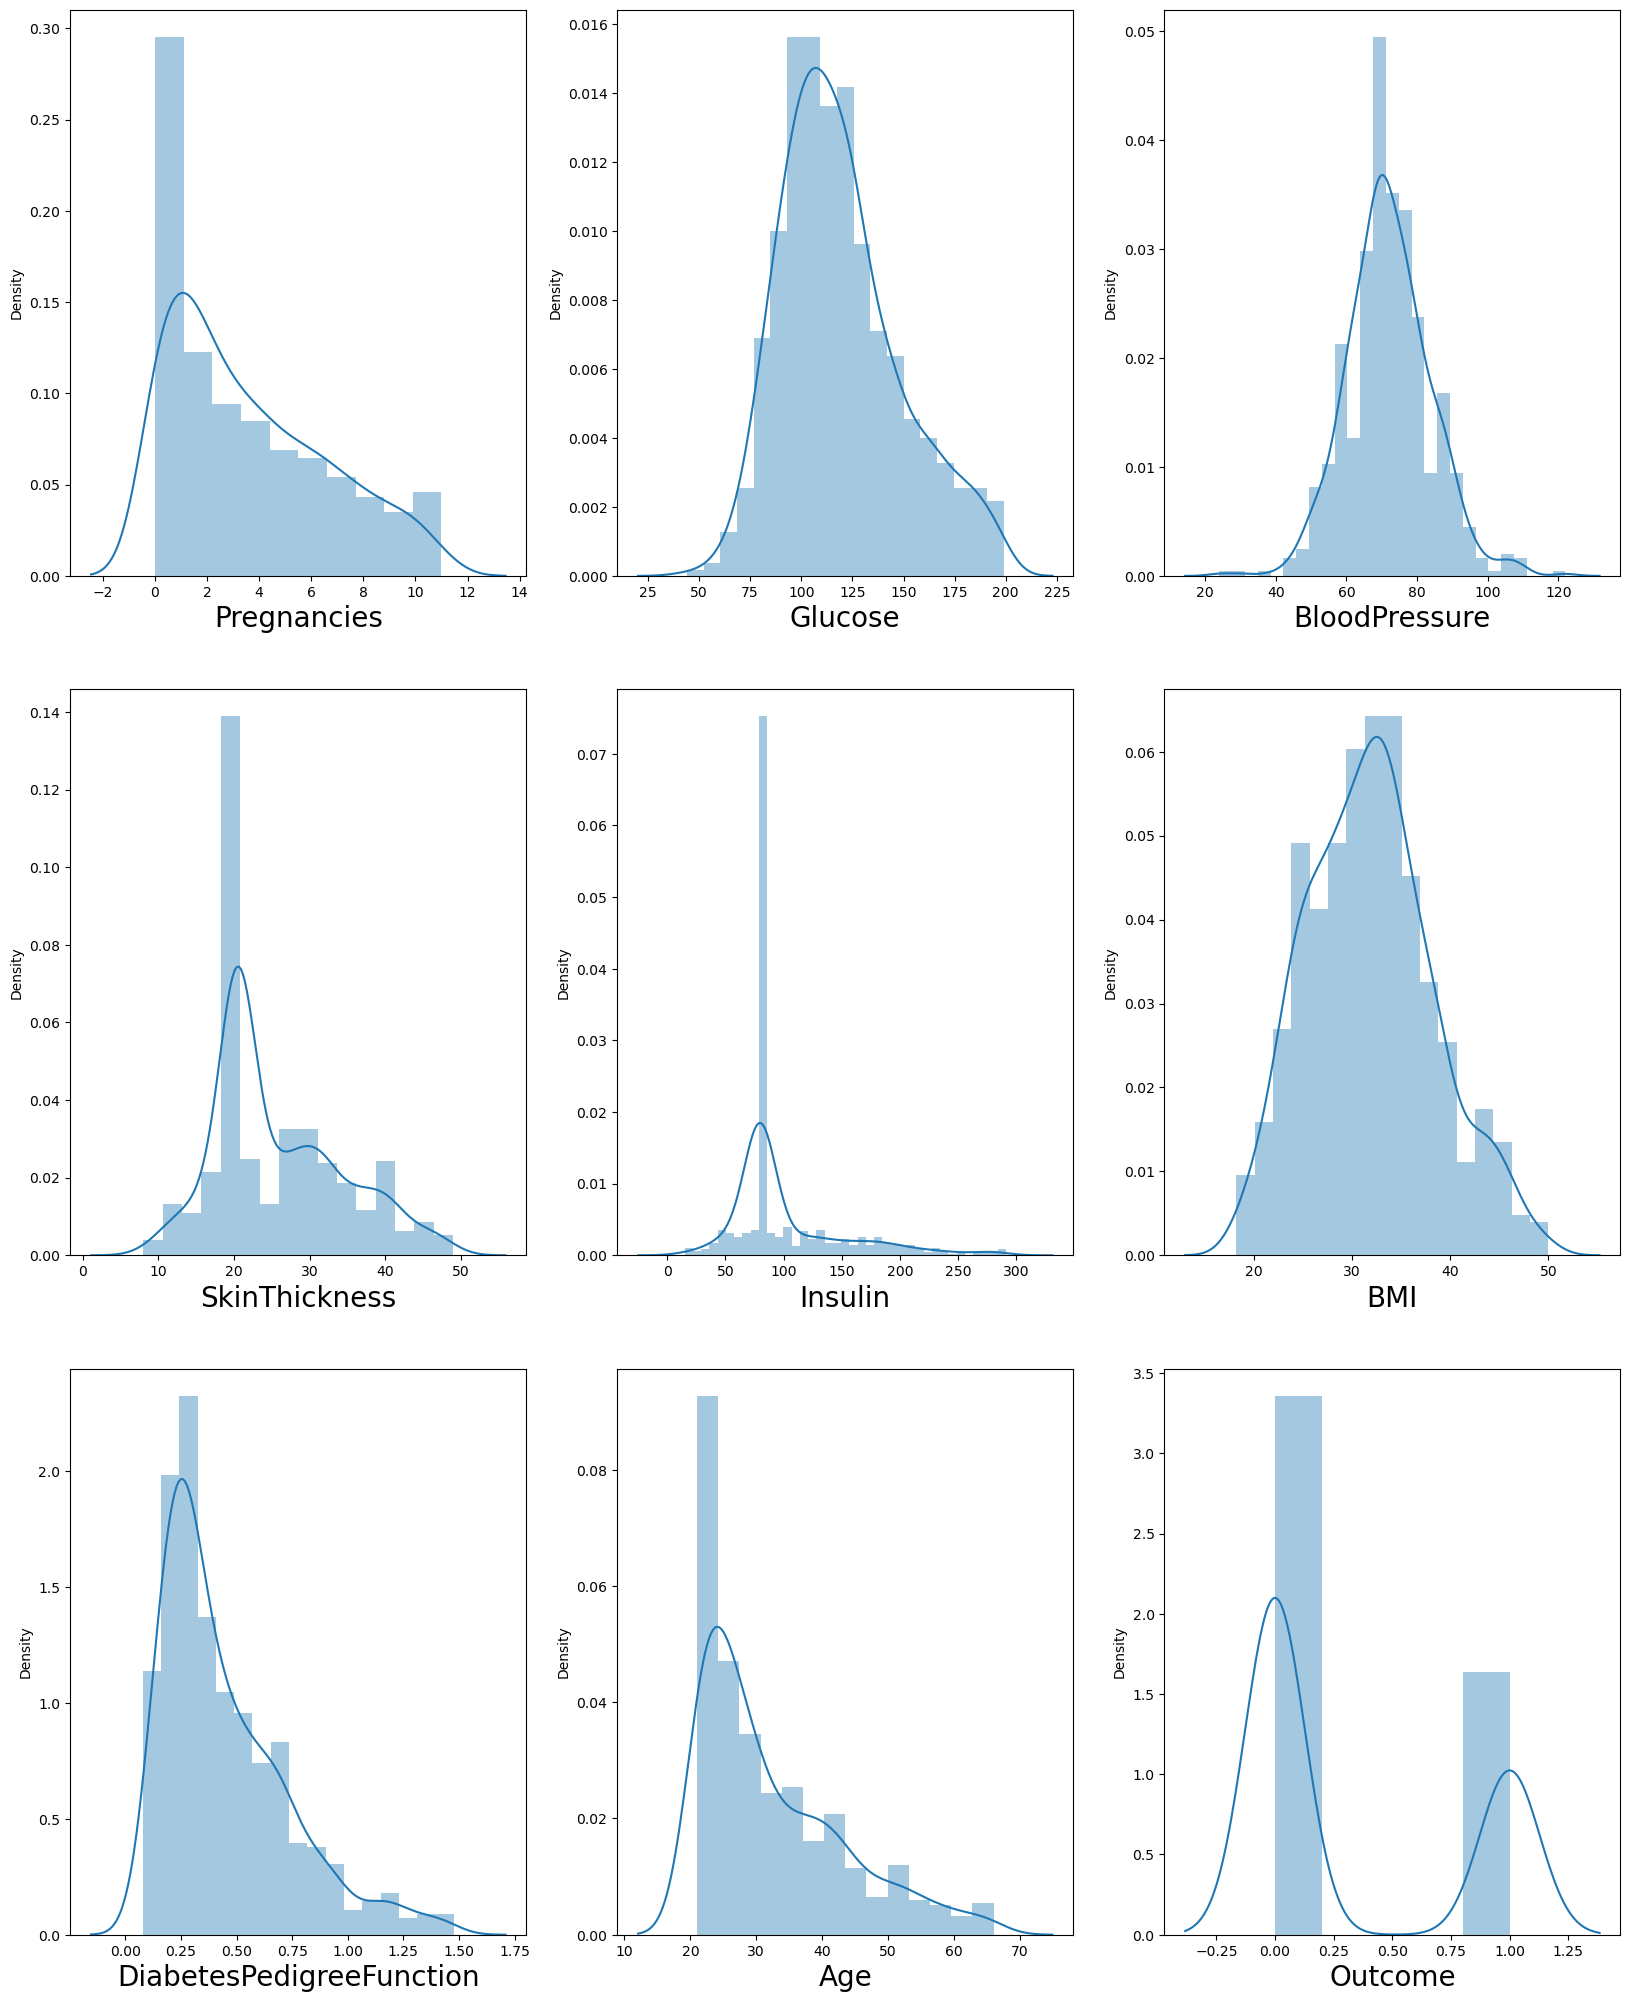

In [165]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

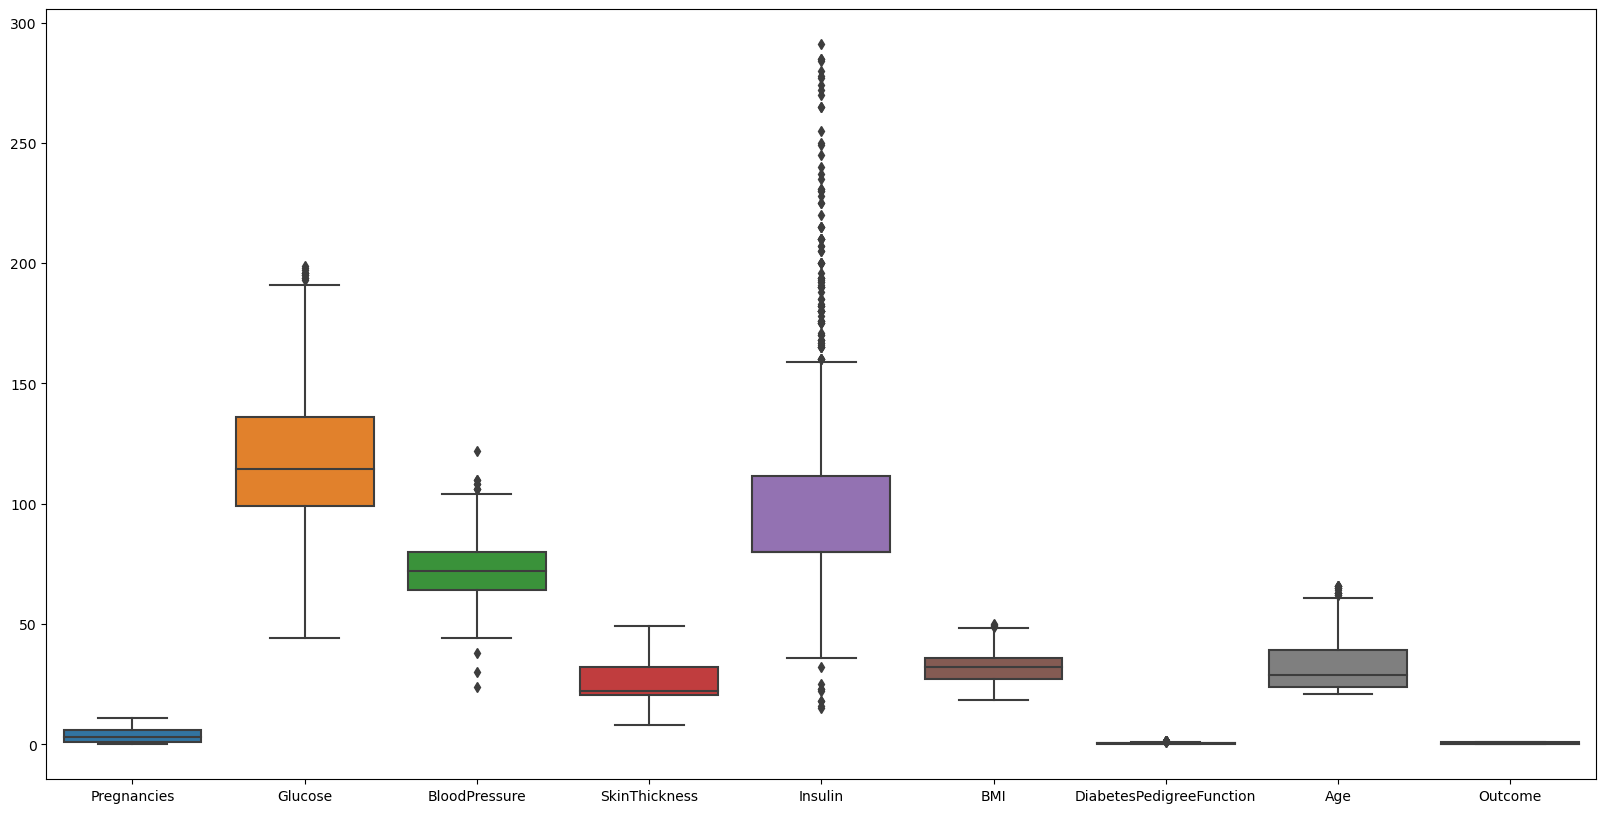

In [166]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data_cleaned, orient='v')

#### Observation :
- In most columns outliers got reduced

### Splitting the data into input features (X) and output label (y)
The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [167]:
# Only the features

#X = df.iloc[:, :-1]
X = data_cleaned.drop(columns = ['Outcome'])  
X

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[674 rows x 8 columns]

In [168]:
# Only the label

y = data_cleaned['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

### Log transformation or boxcox transformation
- Box-cox transformation is to transform the non-normally distributed independent feature to normally distributed.
- If your data is normally distributed then you'll be able to apply more statistical tests.

Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that

In [169]:
# Standardization or Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [170]:
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [171]:
# Multicolinearity
# VIF : Variation Inflation Formula

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

vif                  Features
0  1.449056               Pregnancies
1  1.304263                   Glucose
2  1.262686             BloodPressure
3  1.470049             SkinThickness
4  1.271017                   Insulin
5  1.513160                       BMI
6  1.042300  DiabetesPedigreeFunction
7  1.662728                       Age

All the VIF values are less than 5 and are very low. That means no multicollinearity. 

Now, we can go ahead with fitting our data to the model. 

Before that, let's split our data in test and training set.

In [172]:
# Splitting our data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [173]:
X_train.shape, X_test.shape

((451, 8), (223, 8))

In [174]:
y_train.shape, y_test.shape

((451,), (223,))

In [175]:
# Training the model with Train data

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [176]:
# Model saving/ pickling the model
# Converting the mathematical equation to serialized value

import pickle
# Writing different model files to file
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(log_reg, f)
    
#Standard scaler project
with open('standardDcaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

##  Saving model to a file

In [177]:
import pickle

# Writing different model files to file
with open ("logreg.pkl", 'wb') as f:
    pickle.dump(log_reg, f)

### Loading the file

In [178]:
model = pickle.load(open('logreg.pkl', 'rb'))

## Prediction from loaded file

In [179]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

In [180]:
test1 = [[1,85,66,29,0,26.6,0.351,31]]

In [181]:
test2 = [[6,148,72,35,0,33.6,0.627,50]]

In [182]:
model.predict(test1)

array([0], dtype=int64)

In [183]:
model.predict(test2)

array([1], dtype=int64)

In [184]:
log_reg.predict(test1)

array([0], dtype=int64)

In [185]:
log_reg.predict(test2)

array([1], dtype=int64)

Observation :
- Saved model file is giving accurate result as per data provided.

In [186]:
# predicting value using train data
y_pred_train = log_reg.predict(X_train)
print(y_pred_train)

# Accuracy of the model
accuracy_train = accuracy_score(y_train, y_pred_train)
print(accuracy_train)

[0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 1 0 0 1 0]
0.7960088691796009


#### Observation :
Prediction of train data is 79%

Let's see how well our model performs on the test data set.

In [187]:
# Predicted value using test data

y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [188]:
# Accuracy of the model 

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7847533632286996

#### Observation :

- Model accuracy in test data is 78%, which is closer to test data predicted value.
- So this model is a genaralised model

In [189]:
# Confusion matix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[140,  16],
       [ 32,  35]], dtype=int64)

In [190]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
true_negative = conf_mat[1][0]
false_negative = conf_mat[1][1]

In [191]:
print(' True  Positive', true_positive, '\n False Positive', false_positive, '\n True Negative', true_negative, '\n False Negative', false_negative)

 True  Positive 140 
 False Positive 16 
 True Negative 32 
 False Negative 35


#### Accuracy
It is the metric to evaluate how correcct the model is to predict the values.
Accuracy = Number of correct predictions Total number of predictions.

In [192]:
# Claculating the Accuracy

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7713004484304933

#### Observation :

Accuracy as per confusion matrix is 77%

#### Precision
Out of all actual values, how many are correctly predicted

In [193]:
# Calculating Precision 

precision = true_positive/(true_positive+false_positive)
precision

0.8974358974358975

#### Observation :
- Model's Precision value is 89%
- Means out of all actual value 89% of value correctly predicted.

#### Recall
From all the predicted values how many are correctly predicted.

In [194]:
# Calculating Recall 

recall = true_positive/(true_positive+false_negative)
recall

0.8

#### Observation :
- Model's Recall value is 80%
- Means out of all predicted values 80% of value correctly predicted.

#### F1 score
F1 score is the best choice if your distrubution is uneven. Accuracy works best if false_positive and false_negative have similar cost. If cost of false_positive and false_negative is very different then we have to go for Precision and Recall and calculate harmonic mean.

In [195]:
# F1 score

F1_score = 2*(recall * precision)/(recall + precision)
F1_score

0.8459214501510575

#### Observation :
- Model's F1 score is 84%, which is higher than accuracy score

#### Classification Report
classification report is a performance evaluation metric.It is used to show the precision, recall, F1 Score, and support of your trained classification model

In [196]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [197]:
ClassificationReort = classification_report(y_test, y_pred)
ClassificationReort

'              precision    recall  f1-score   support\n\n           0       0.81      0.90      0.85       156\n           1       0.69      0.52      0.59        67\n\n    accuracy                           0.78       223\n   macro avg       0.75      0.71      0.72       223\nweighted avg       0.78      0.78      0.78       223\n'

#### To display confusion matix

In [198]:
from sklearn.metrics import plot_confusion_matrix

<Figure size 500x500 with 0 Axes>

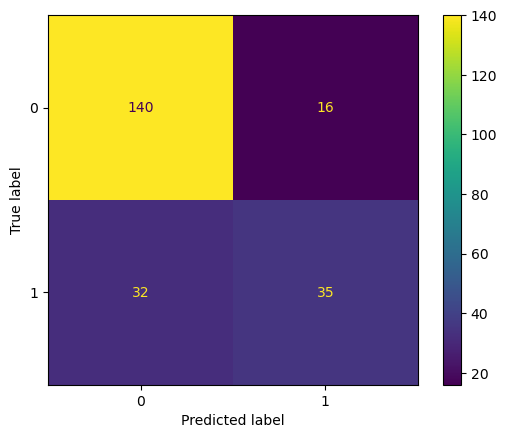

In [199]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

Observation :

As per confusion matix - True Positive - 140

                         False Positive - 16
                         
                         True Negative - 35
                         
                         False Negative - 32

#### AUC
AUC determines which model(Logistic Regression/SVM/clustering) is the best(with highest AUC value) for classification problem.

In [200]:
auc = roc_auc_score(y_test, y_pred)
auc

0.709911978568695

#### Observation :

The AUC score of the model is 70%

#### ROC
ROC curve is the graphical representation with respect to True Positive Rate and False Positive Rate. If the curve is closure to the top left corner then model performance is better and the closure to the 45 degree line, model is less accurate.

In [201]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

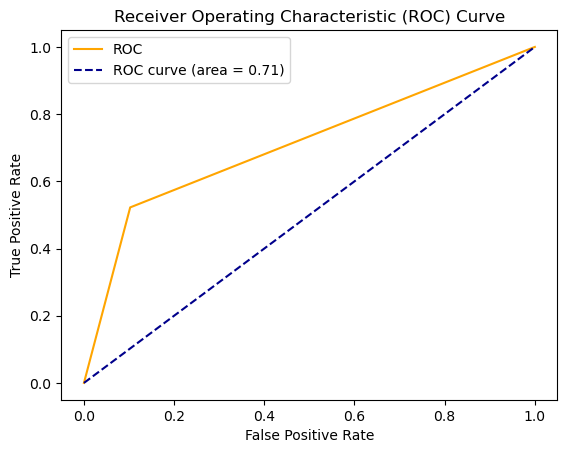

In [202]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Observation :

ROC curve is towards left side corner, means model is good.